# Library

In [ ]:
# Data Processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Model
from sklearn.ensemble import RandomForestRegressor #Model RandomForest
from sklearn.linear_model import LinearRegression #Model Linear Regression
from sklearn.tree import DecisionTreeRegressor #Model Decision Tree
from joblib import dump, load

# Data Preparation For Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Model Evaluation
from sklearn.metrics import mean_squared_error #Untuk evaluasi performa model
from sklearn.metrics import mean_absolute_error #Untuk evaluasi performa model
from sklearn.metrics import r2_score #Untuk evaluasi performa model

# Import Dataset

In [ ]:
path_files = '/content/drive/MyDrive/Data Science KPTK/automobile.csv'

auto_df = pd.read_csv(path_files,
                      names= ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors",
                              "body-style","drive-wheels","engine-location","wheel-base","length","width",
                              "height","curb-weight","engine-type","num-of-cylinders","engine-size",
                              "fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm",
                              "city-mpg","highway-mpg","price"])
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Examining the Data

In [ ]:
auto_df.shape

(205, 26)

In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
object_columns = auto_df.select_dtypes(include=['object'])

# Apply value_counts to each column
for column in object_columns.columns:
    counts = auto_df[column].value_counts().head()
    print(f"Counts for {column}:\n{counts}\n")

Counts for normalized-losses:
?      41
161    11
91      8
150     7
134     6
Name: normalized-losses, dtype: int64

Counts for make:
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
Name: make, dtype: int64

Counts for fuel-type:
gas       185
diesel     20
Name: fuel-type, dtype: int64

Counts for aspiration:
std      168
turbo     37
Name: aspiration, dtype: int64

Counts for num-of-doors:
four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Counts for body-style:
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

Counts for drive-wheels:
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

Counts for engine-location:
front    202
rear       3
Name: engine-location, dtype: int64

Counts for engine-type:
ohc     148
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine-type, dtype: int64

Counts for num-of-cylinders:
four     159
six      

In [ ]:
object_columns = ['normalized-losses','num-of-doors','num-of-cylinders','bore','stroke','horsepower','peak-rpm','price']

# Apply value_counts to each column
for column in object_columns:
    counts = auto_df[column].value_counts()
    print(f"Counts for {column}:\n{counts}\n")

Counts for normalized-losses:
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

Counts for num-of-doors:
four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Counts for num-of-cylinders:
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

Counts for bore:
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.

## Cleaning the Dataset

In [ ]:
auto_df_clean = auto_df.copy()

auto_df_clean = auto_df.replace('?',np.NaN)
auto_df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
mapped_columns = ['num-of-doors','num-of-cylinders']
data_mapping = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6,
                'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12}

for col in mapped_columns:
  auto_df_clean[col] = auto_df_clean[col].map(data_mapping).astype(float).astype('Int64')

auto_df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
for col in object_columns:
  if col not in mapped_columns:
    auto_df_clean[col] = auto_df_clean[col].astype(float)

auto_df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
auto_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    Int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    Int64  
 16  engine-size        205 non

## Descriptive Statistics

In [ ]:
# Melihat deskriptif statistik pada kolom numerik
auto_df_clean.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,203.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.0,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,2.0,86.600000,141.100000,60.300000,47.800000,1488.000000,2.0,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.0,94.500000,166.300000,64.100000,52.000000,2145.000000,4.0,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.0,97.000000,173.200000,65.500000,54.100000,2414.000000,4.0,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.0,102.400000,183.100000,66.900000,55.500000,2935.000000,4.0,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.0,120.900000,208.100000,72.300000,59.800000,4066.000000,12.0,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Melihat deskriptif statistik pada kolom numerik
auto_df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
normalized-losses,164.0,122.0,35.442168,65.0,94.0,115.0,150.0,256.0
num-of-doors,203.0,3.123153,0.994841,2.0,2.0,4.0,4.0,4.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
num-of-cylinders,205.0,4.380488,1.080854,2.0,4.0,4.0,4.0,12.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0


In [ ]:
# Melihat deskriptif statistik pada kolom kategorikal atau object
auto_df_clean.describe(include='object')

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
count,205,205,205,205,205,205,205,205
unique,22,2,2,5,3,2,7,8
top,toyota,gas,std,sedan,fwd,front,ohc,mpfi
freq,32,185,168,96,120,202,148,94


## Handling Missing Values
* Pengolahan Nilai yang Hilang adalah Langkah yang Sangat Penting dalam Pembuatan Model Pembelajaran Mesin
* Nilai yang Hilang dapat disebabkan oleh berbagai alasan seperti pengisian formulir yang tidak lengkap, nilai yang tidak tersedia, dll.
* Ada begitu banyak jenis Nilai yang Hilang seperti
   * Nilai yang Hilang secara Acak
   * Nilai yang Hilang tidak Acak
   * Nilai yang Hilang secara Benar-benar Acak
* Apa yang dapat kita lakukan untuk Mengisi atau Mengatasi Nilai yang Hilang agar dapat Membuat Model Pembelajaran Mesin yang Baik
   * Kita dapat menggunakan Logika Bisnis untuk Mengganti Nilai yang Hilang
   * Kita dapat menggunakan Metode Statistik seperti Rata-rata, Median, dan Modus.
   * Kita dapat menggunakan Teknik Pembelajaran Mesin untuk mengganti Nilai yang Hilang
   * Kita dapat menghapus Nilai yang Hilang, ketika persentase Nilai yang Hilang sangat Tinggi.

* Kapan menggunakan Rata-rata, dan kapan menggunakan Median?
   * Kita menggunakan Rata-rata, ketika kita tidak memiliki *Outlier* dalam dataset untuk Variabel Numerik.
   * Kita menggunakan Median, ketika kita memiliki *Outlier* dalam dataset untuk Variabel Numerik.
   * Kita menggunakan Modus, Ketika kita memiliki Variab
   el Kategorikal.

In [ ]:
auto_df_clean.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
auto_df_clean.isnull().sum()[auto_df_clean.isnull().sum() > 0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [ ]:
auto_df_clean = auto_df_clean.dropna(subset=['price'])
auto_df_clean.isnull().sum()[auto_df_clean.isnull().sum() > 0]

normalized-losses    37
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [ ]:
auto_df_clean.loc[:, auto_df_clean.isnull().sum() > 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   num-of-doors       199 non-null    Int64  
 2   bore               197 non-null    float64
 3   stroke             197 non-null    float64
 4   horsepower         199 non-null    float64
 5   peak-rpm           199 non-null    float64
dtypes: Int64(1), float64(5)
memory usage: 11.2 KB


In [ ]:
auto_df_clean.loc[:, auto_df_clean.isnull().sum() > 0].columns.to_list()

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm']

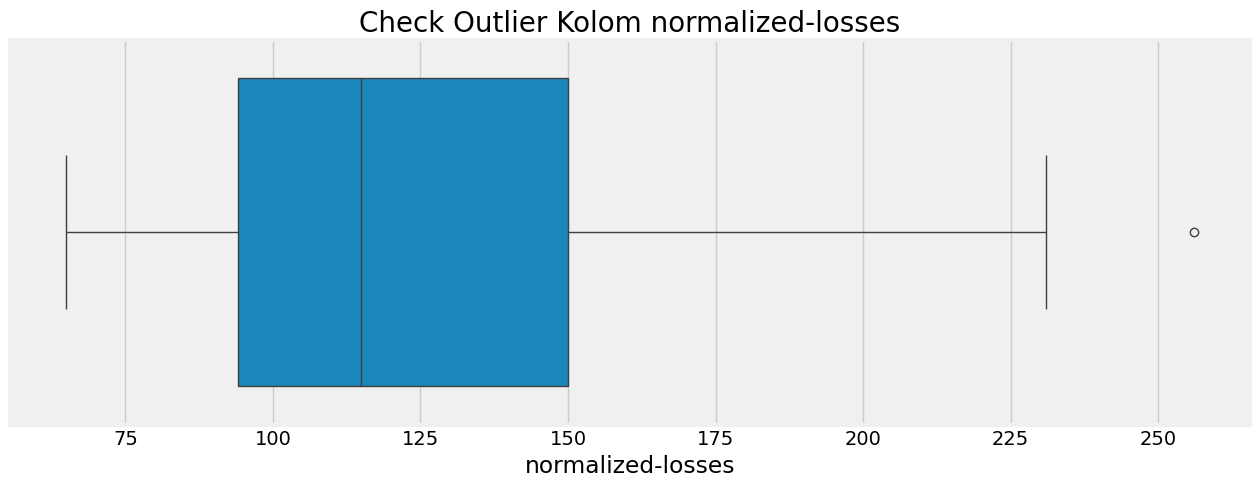

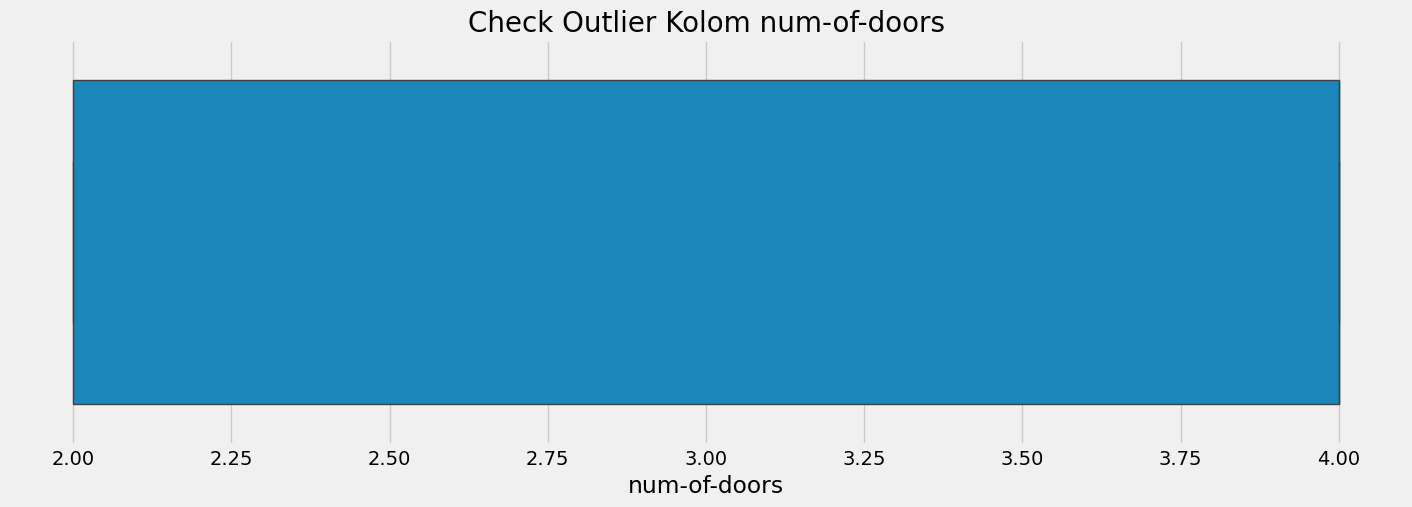

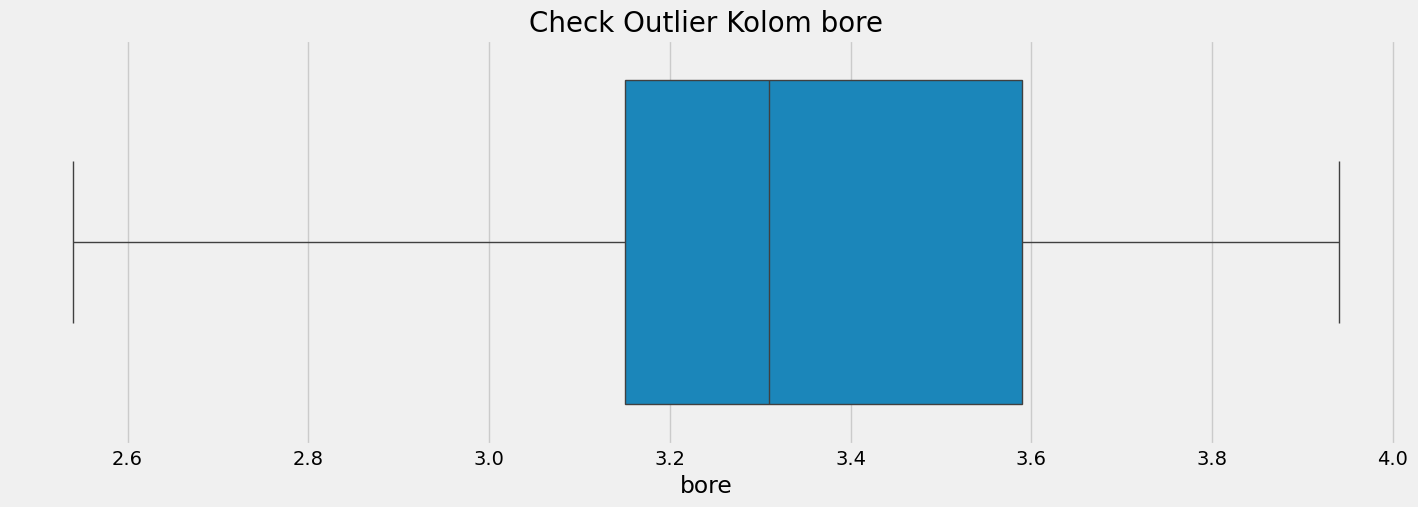

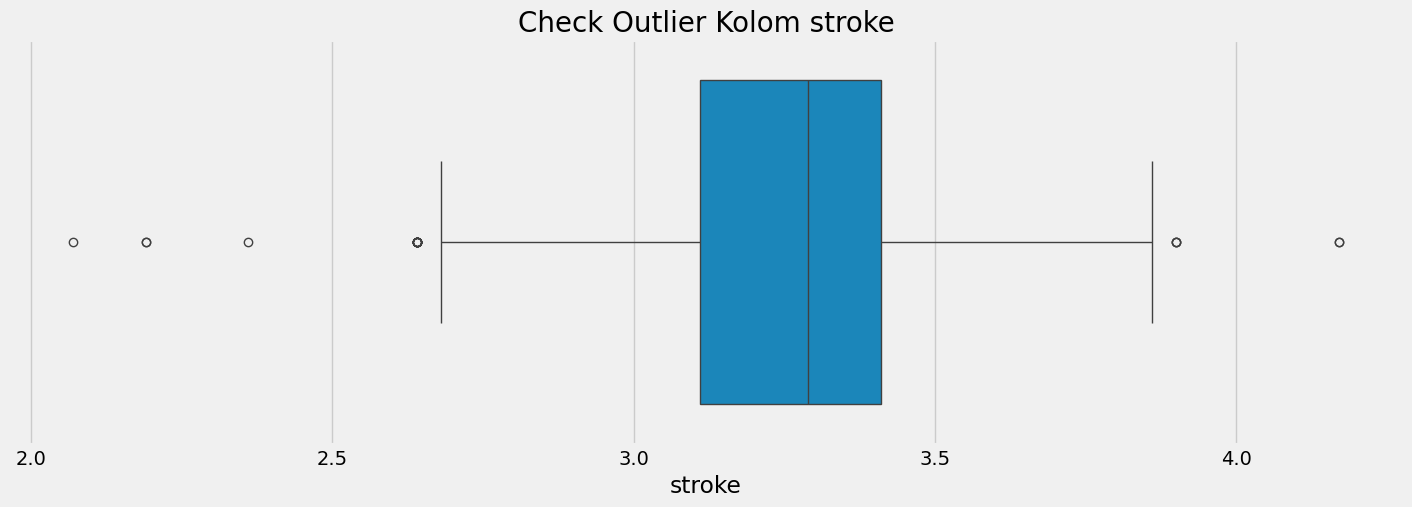

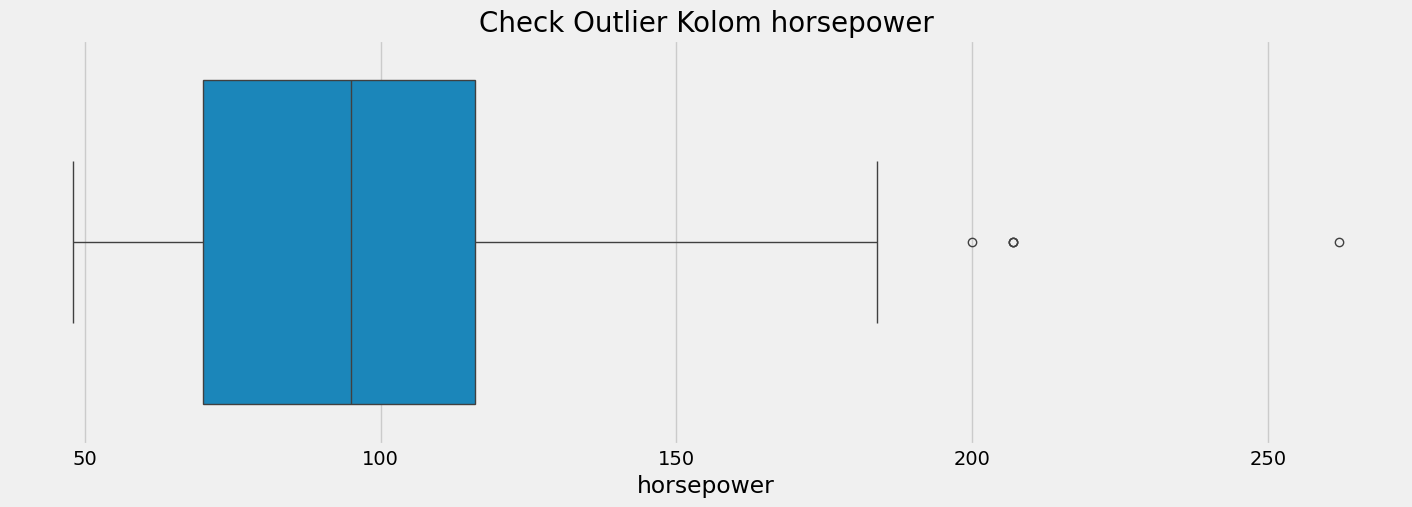

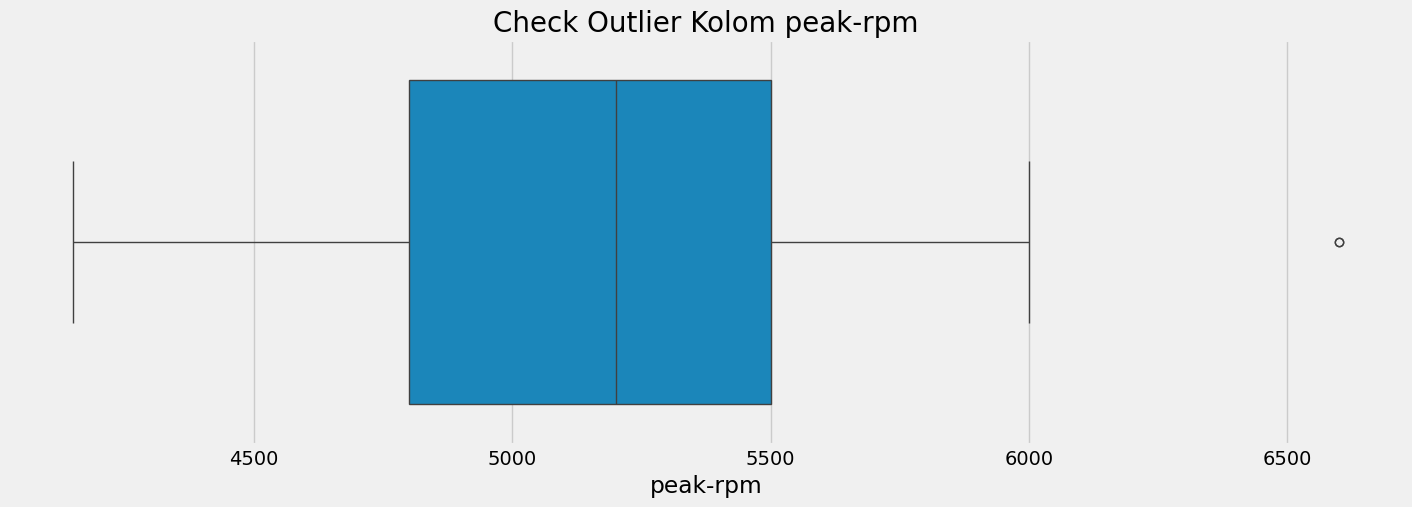

In [ ]:
def plot_box(x, df):
  plt.figure(figsize = (16, 5))
  plt.style.use('fivethirtyeight')
  sns.boxplot(x=x, data=df)
  plt.title('Check Outlier Kolom {}'.format(x), fontsize=20)
  plt.show()

for col in auto_df_clean.loc[:, auto_df_clean.isnull().sum() > 0].columns.to_list():
  plot_box(str(col), auto_df_clean)

In [ ]:
auto_df_clean['num-of-doors'].mean()

3.135678391959799

In [ ]:
auto_df_clean['num-of-doors'].mode()[0]

4

In [ ]:
auto_df_clean[auto_df_clean['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,<NA>,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,<NA>,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:
nan_with_outliers = ['normalized-losses','stroke','horsepower','peak-rpm']
nan_without_outliers = ['bore']
nan_categorical = ['num-of-doors']

for col in nan_with_outliers:
  auto_df_clean[col] = auto_df_clean[col].fillna(auto_df_clean[col].median())

for col in nan_without_outliers:
  auto_df_clean[col] = auto_df_clean[col].fillna(auto_df_clean[col].mean())

for col in nan_categorical:
  auto_df_clean[col] = auto_df_clean[col].fillna(auto_df_clean[col].mode()[0])

In [ ]:
auto_df_clean.isnull().sum()[auto_df_clean.isnull().sum() > 0]

Series([], dtype: int64)

#Data Analysis/Visualizations

## Univariate Analysis

Univariate analysis mungkin merupakan bentuk analisis statistik yang paling sederhana. Seperti bentuk statistik lainnya, itu bisa bersifat inferensial atau deskriptif. Fakta kunci adalah bahwa hanya satu variabel yang terlibat. Analisis univariat dapat memberikan hasil yang menyesatkan dalam kasus di mana analisis multivariat lebih sesuai.

* Ini adalah langkah penting, untuk memahami variabel-variabel yang ada dalam dataset satu per satu.
* Pertama, kita akan memeriksa Analisis Univariat untuk Kolom Numerik untuk memeriksa keberadaan Pencilan dengan menggunakan Box plot.
* Kemudian, kita akan menggunakan plot Distribusi untuk memeriksa distribusi Kolom Numerik dalam Dataset.
* Setelah itu, kita akan memeriksa Analisis Univariat untuk Kolom Kategorikal menggunakan Pie chart, dan Count plot.
* Kita menggunakan Pie chart, ketika kita memiliki sedikit kategori dalam kolom kategorikal, dan kita menggunakan count plot jika kita memiliki lebih banyak kategori dalam dataset.

In [ ]:
def plot_box(x, df):
  plt.figure(figsize = (16, 5))
  plt.style.use('fivethirtyeight')
  sns.boxplot(x=x, data=df)
  plt.title('Persebaran dari kolom {}'.format(x), fontsize=20)
  plt.show()

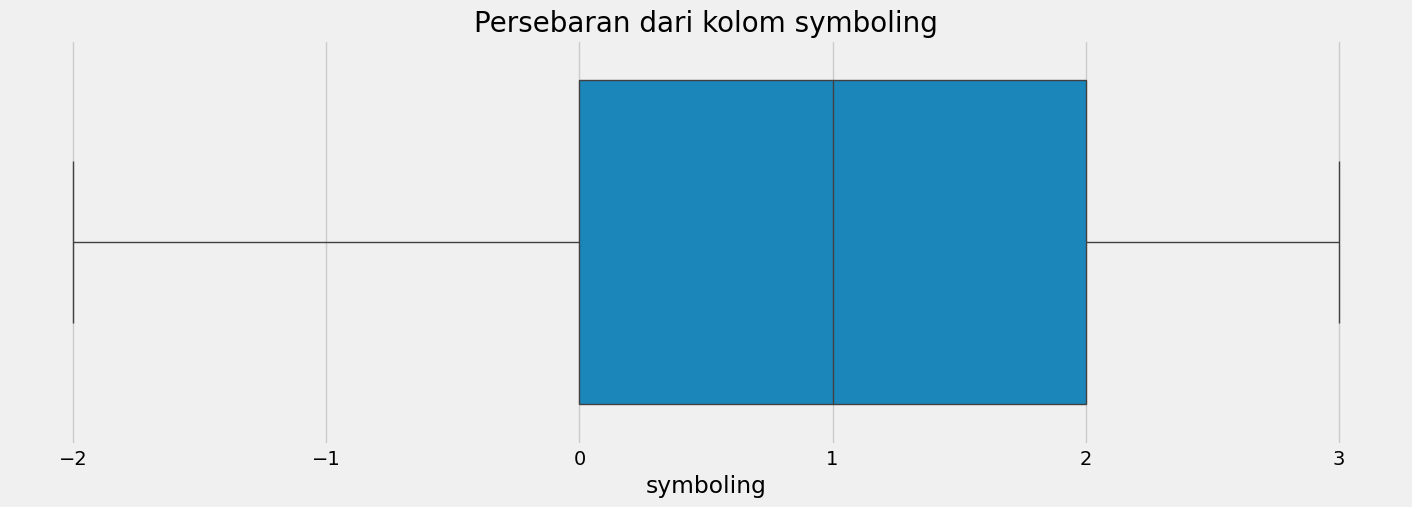

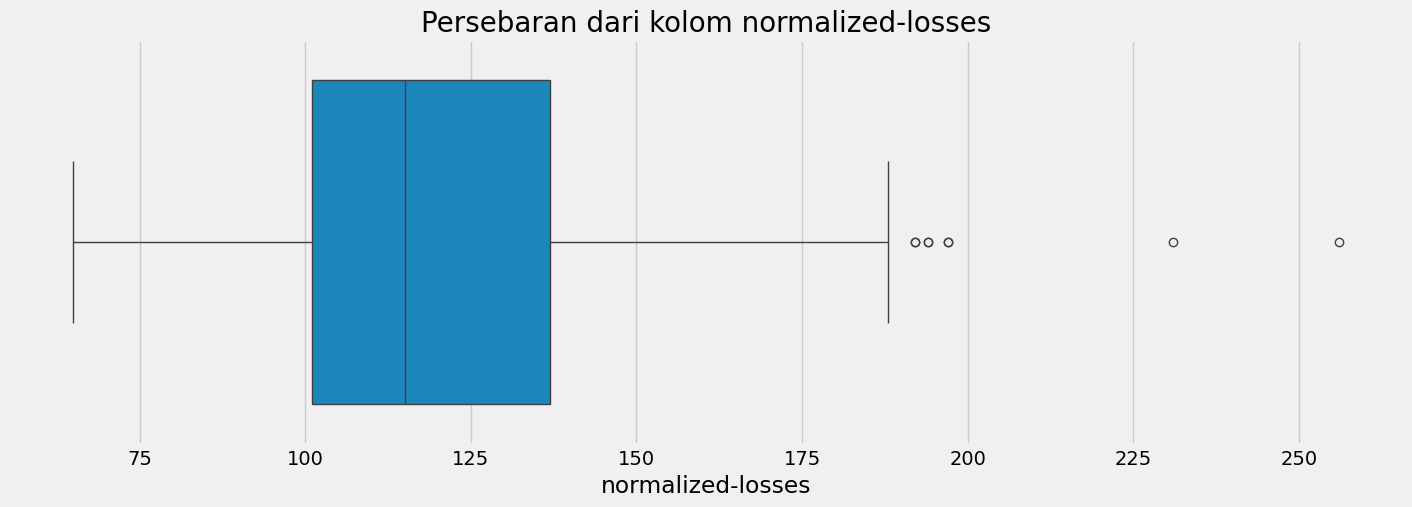

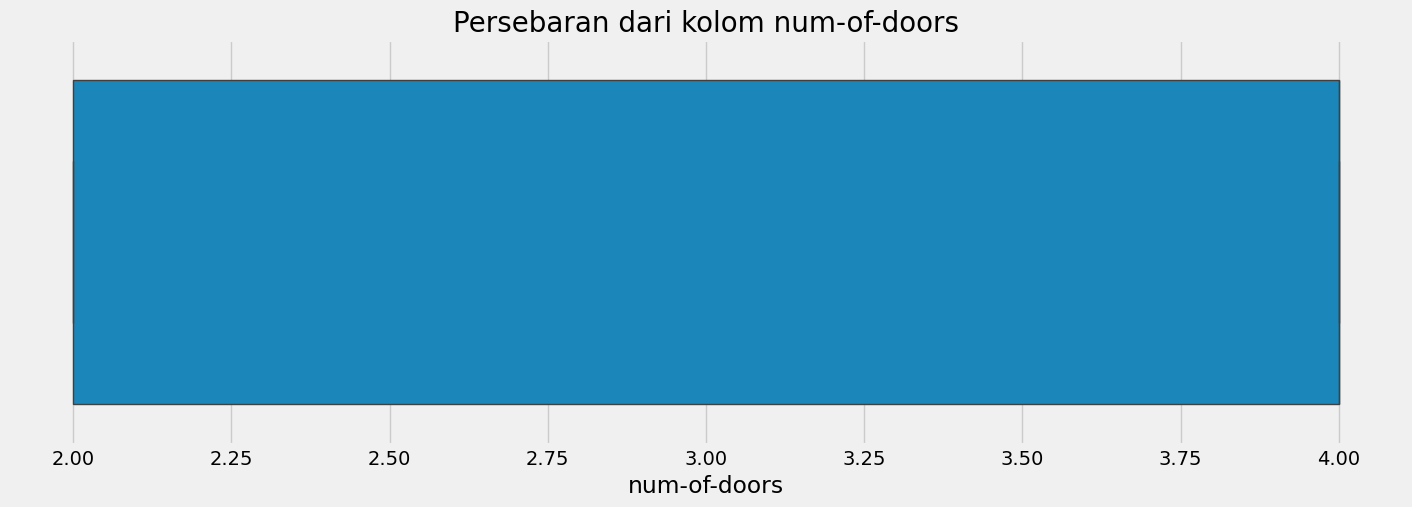

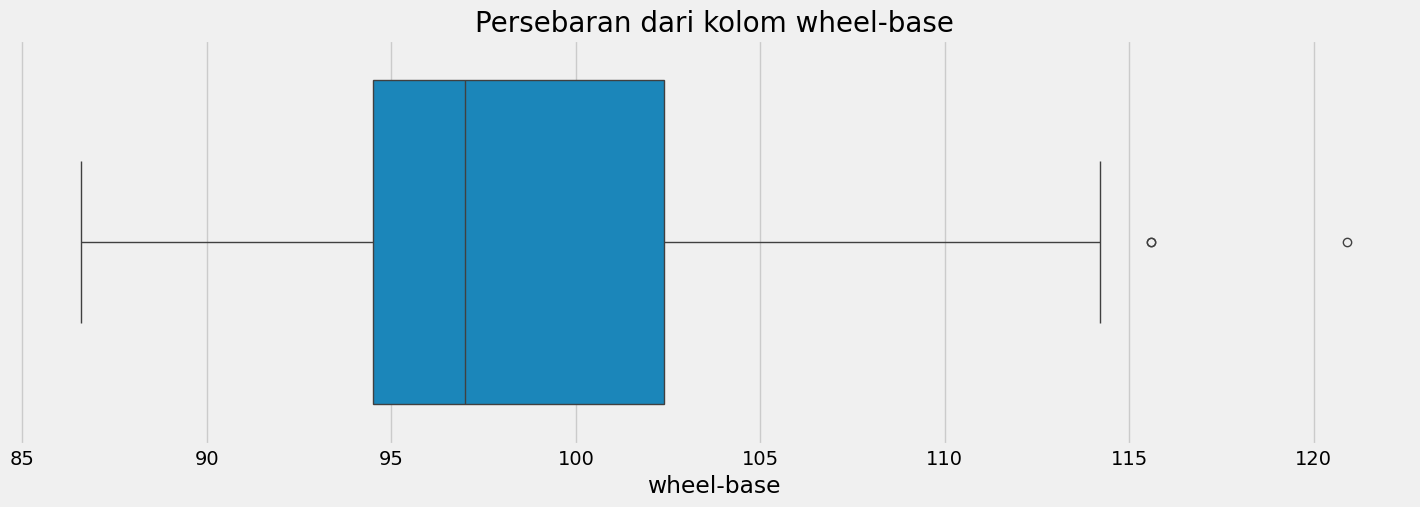

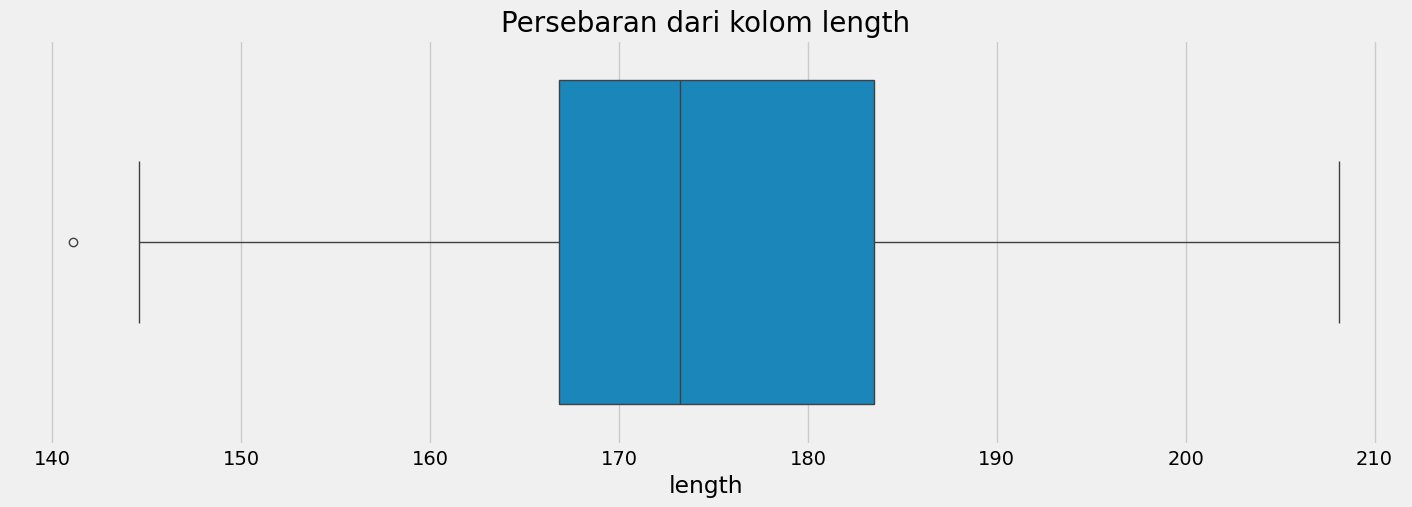

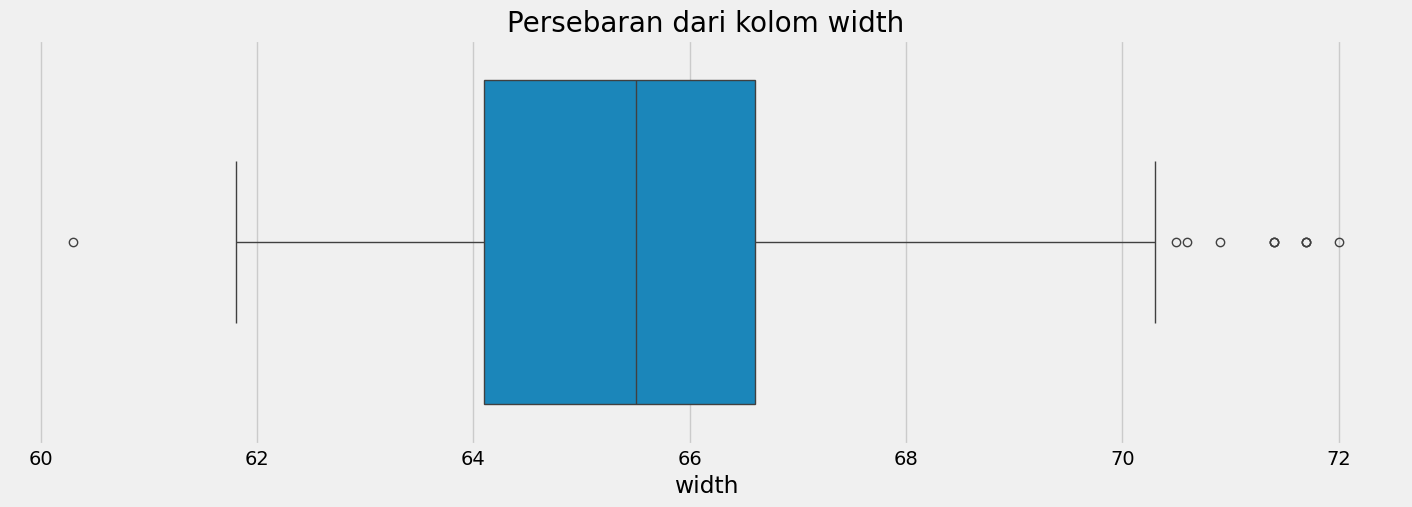

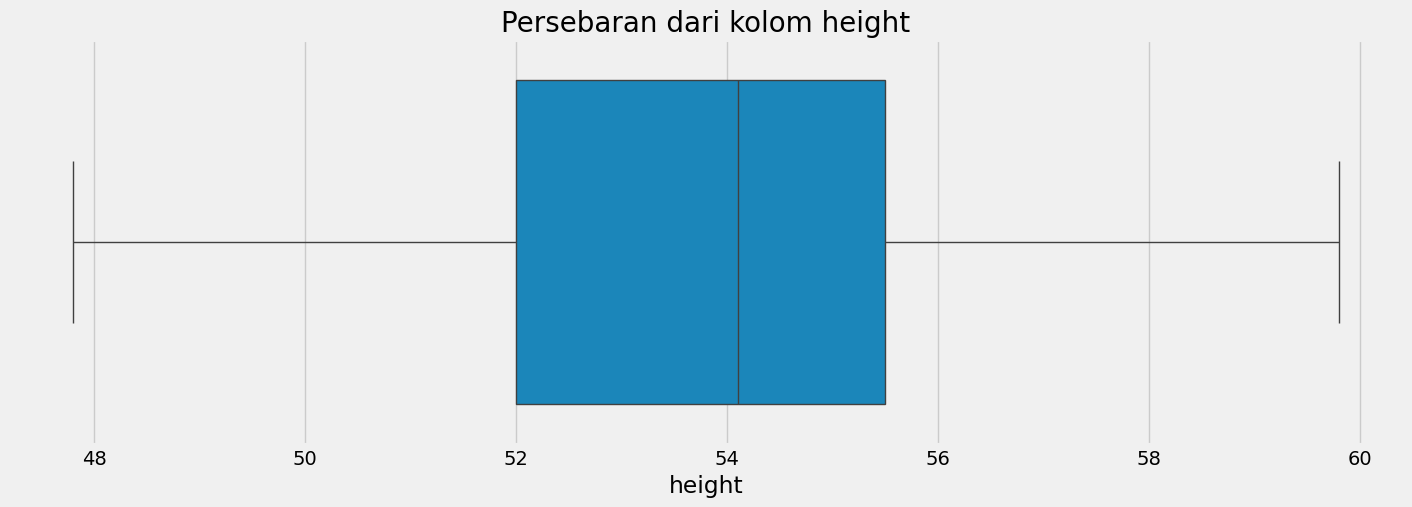

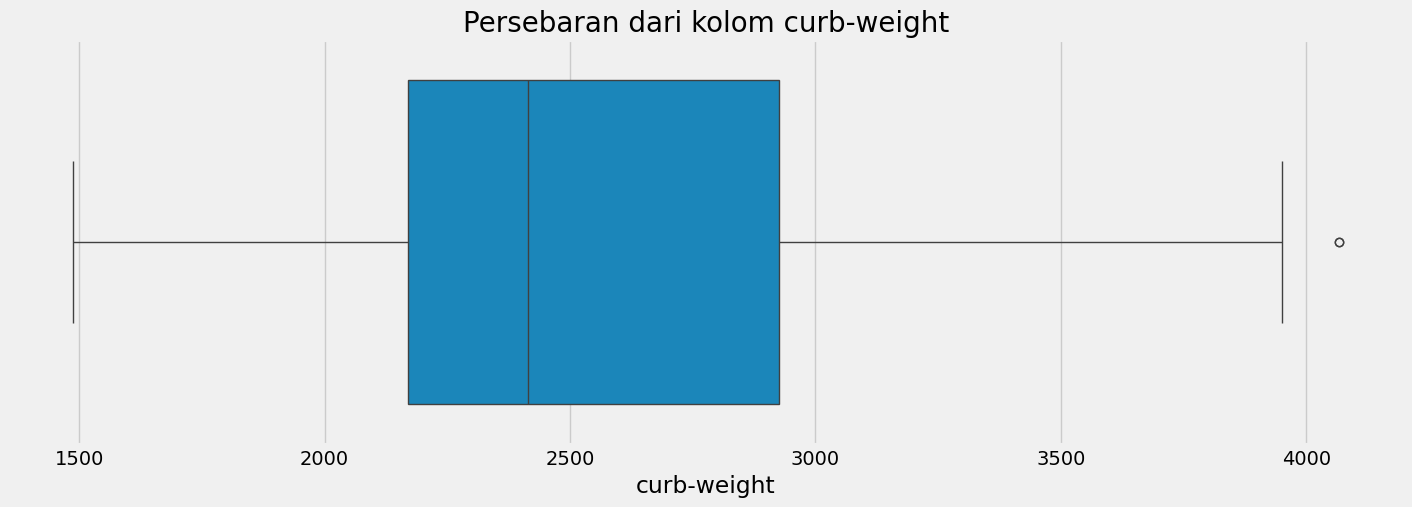

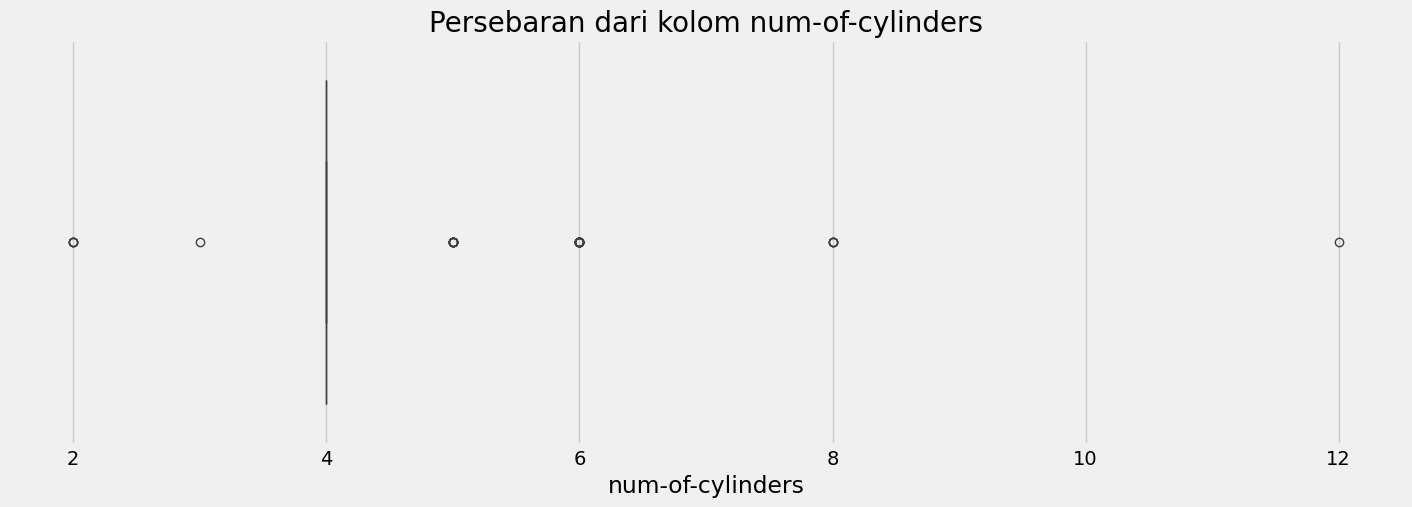

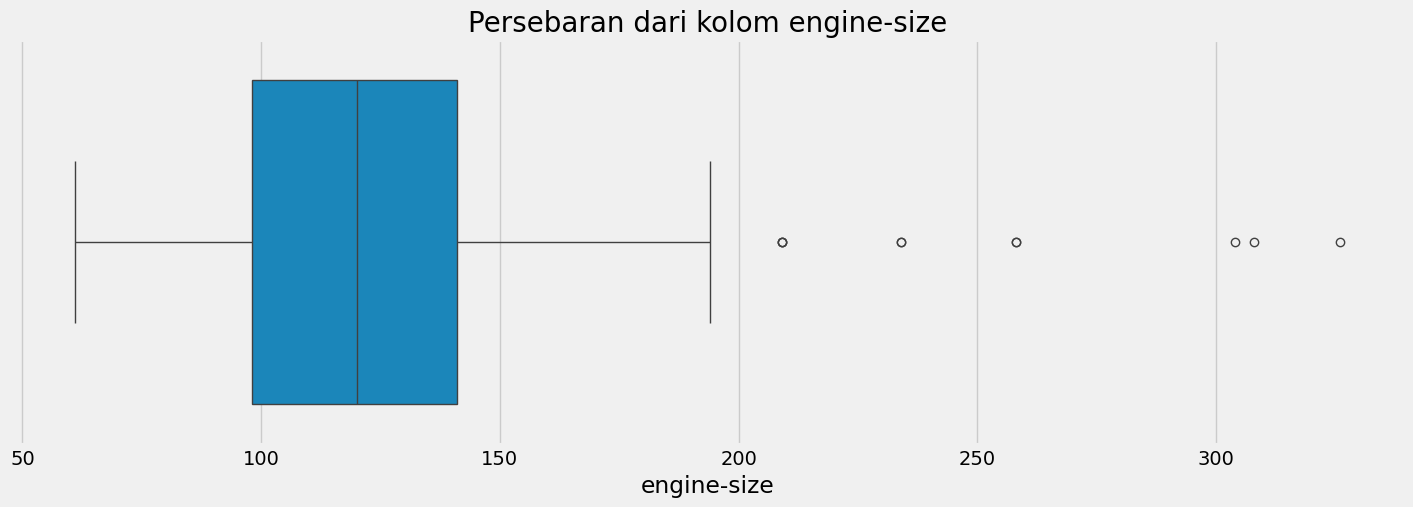

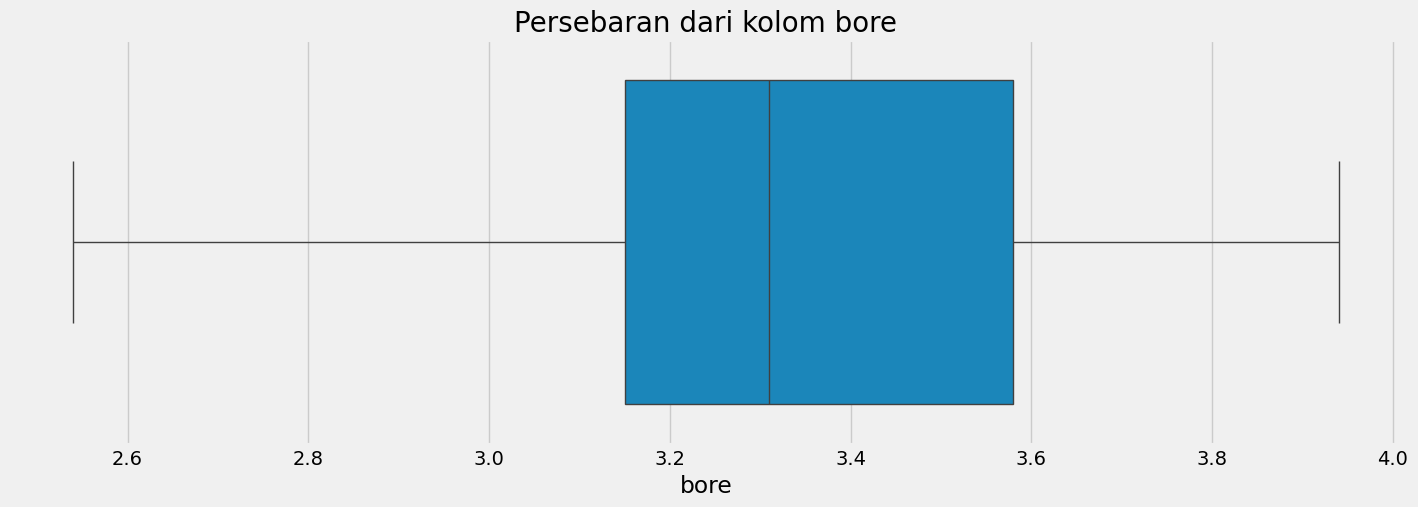

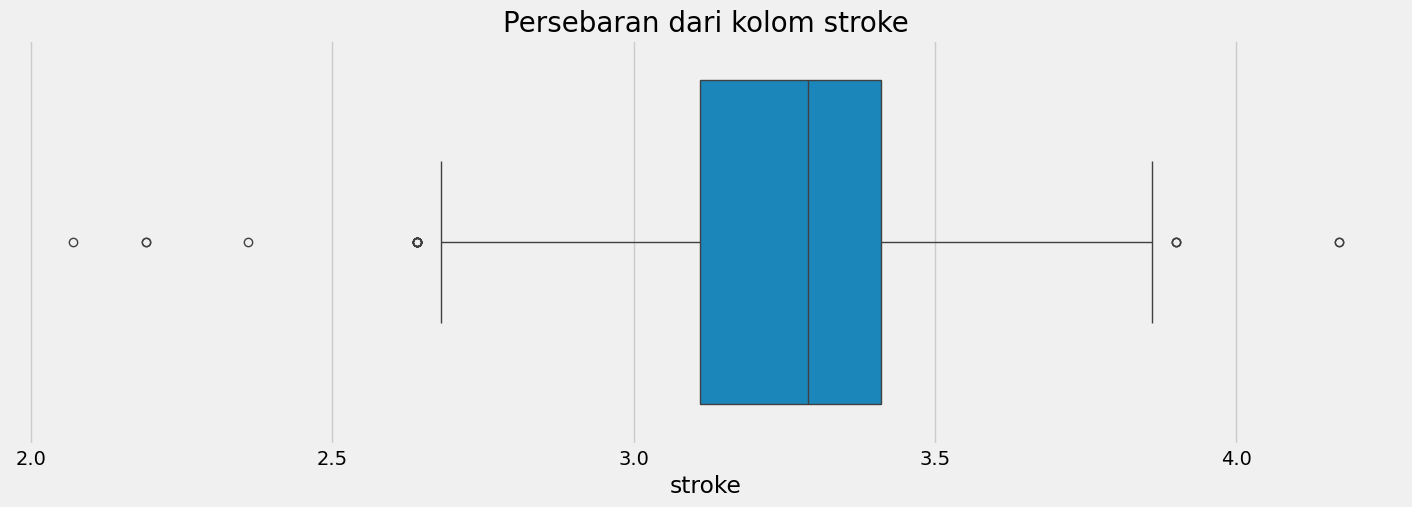

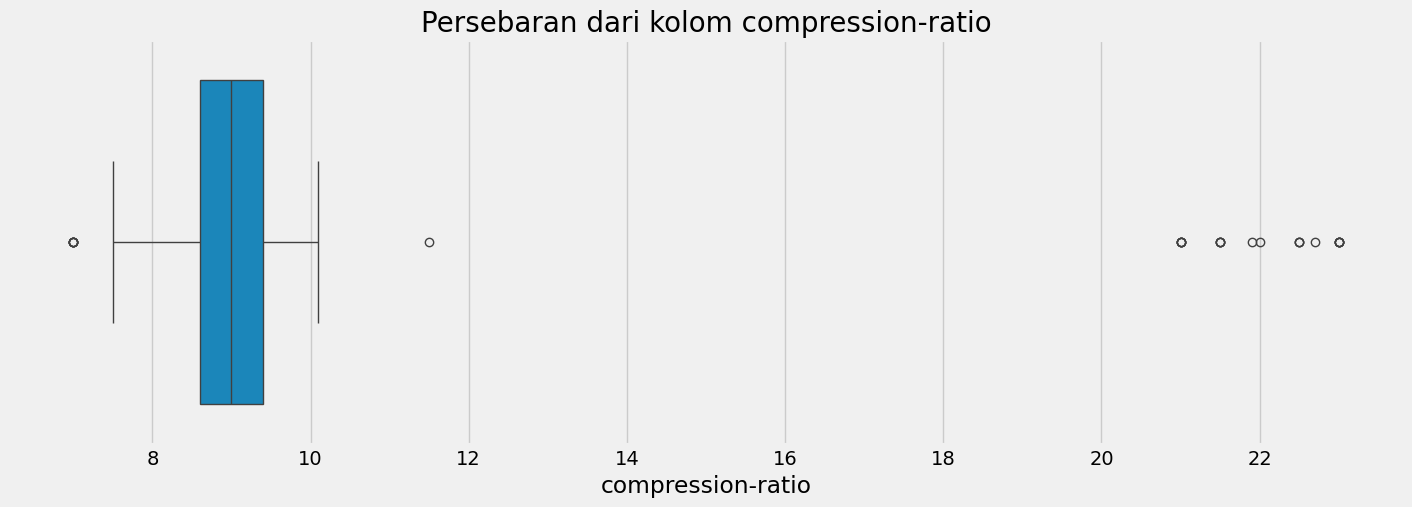

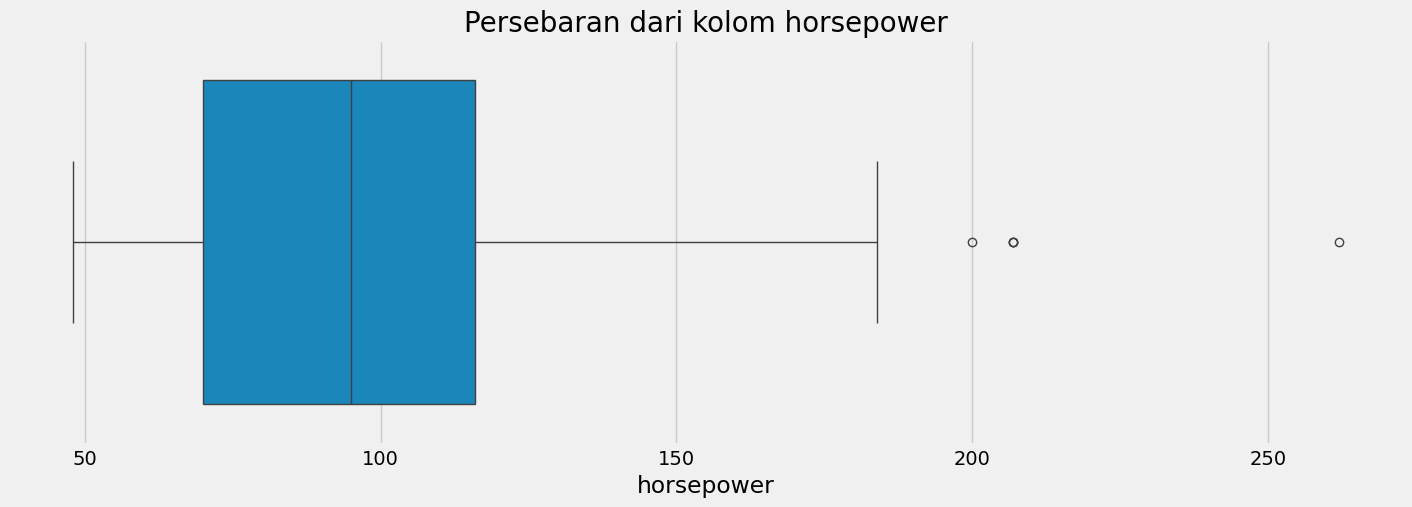

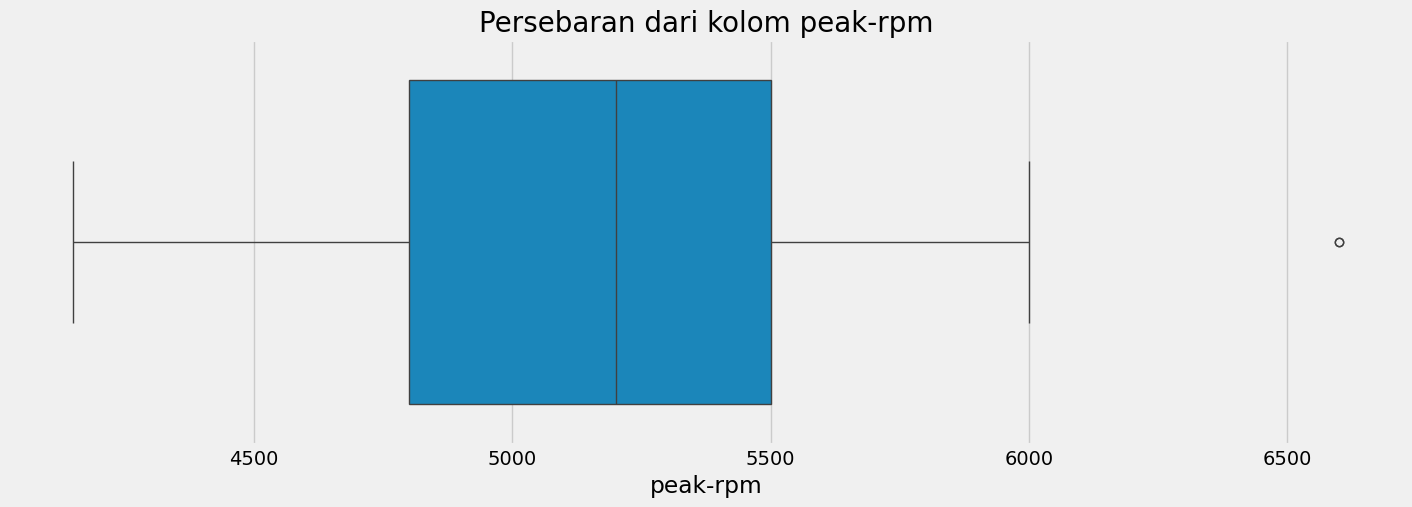

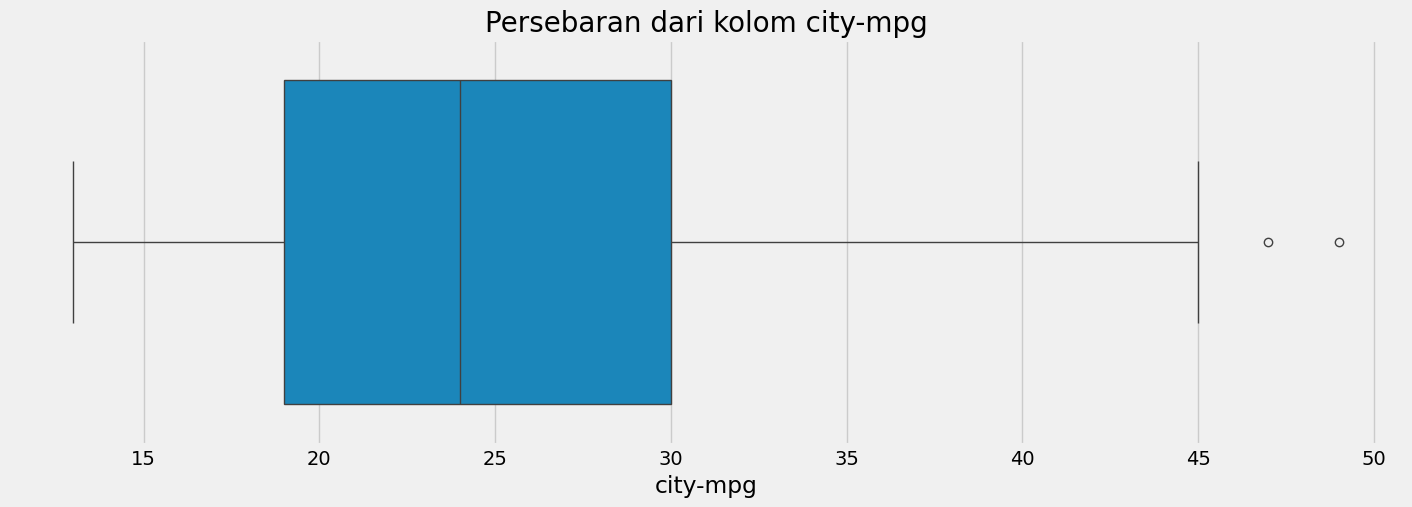

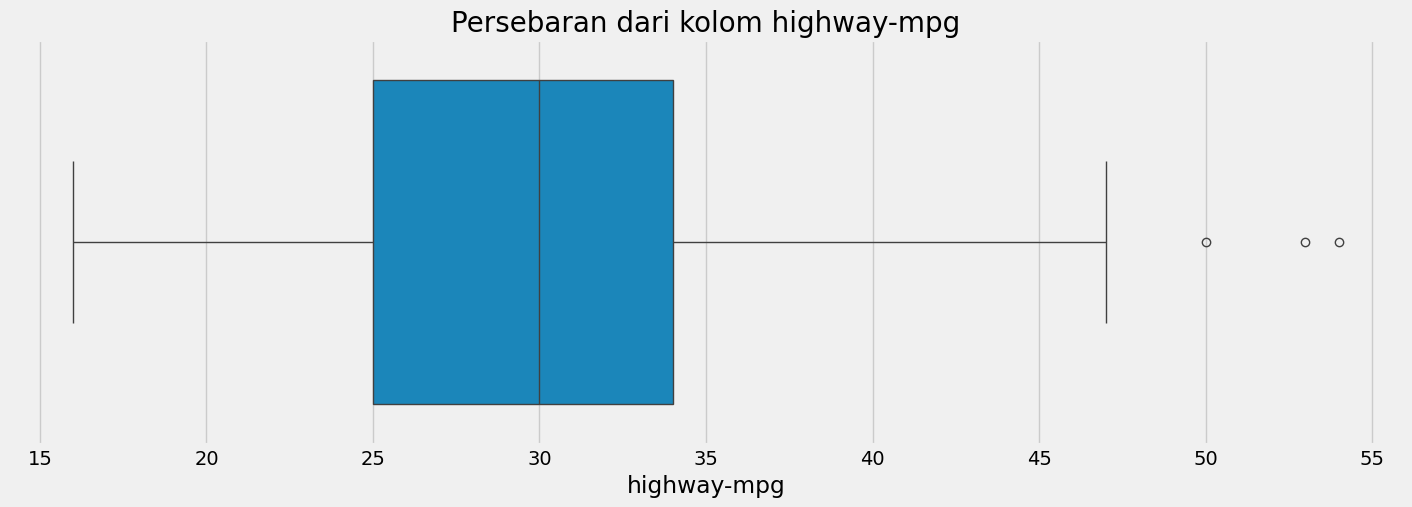

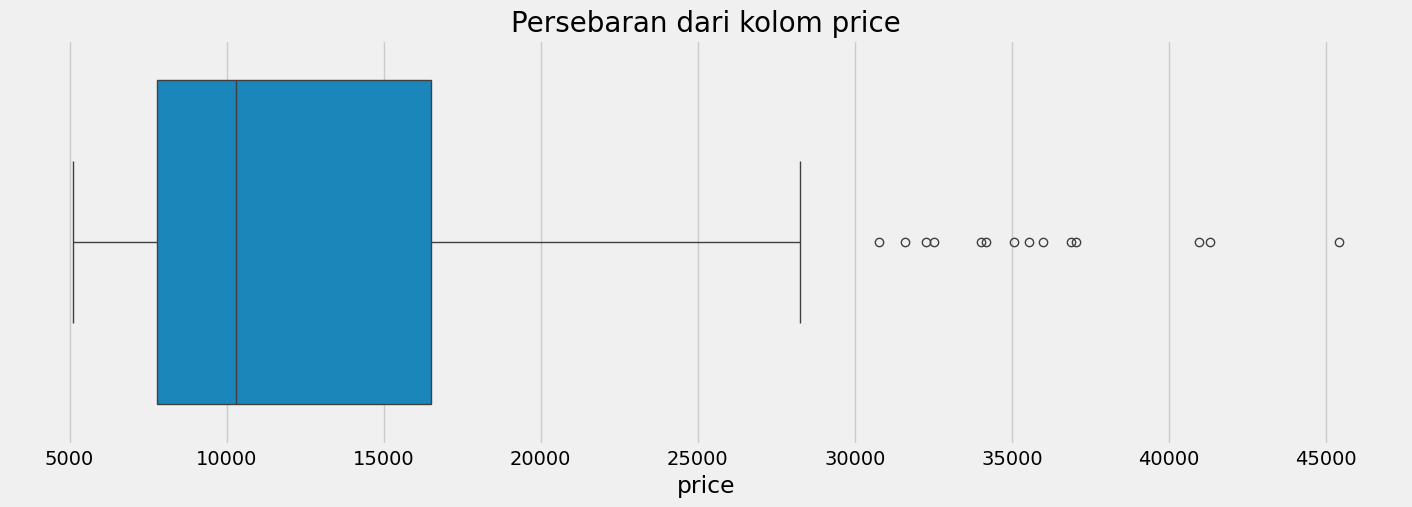

In [ ]:
numerical_columns = auto_df_clean.select_dtypes(include=['float','int'])
for col in numerical_columns:
  plot_box(str(col), auto_df_clean)

In [ ]:
def plot_dist(x, df):
  plt.figure(figsize = (16, 5))
  plt.style.use('fivethirtyeight')
  sns.histplot(df[x])
  plt.title('Persebaran dari kolom {}'.format(x), fontsize=20)
  plt.show()

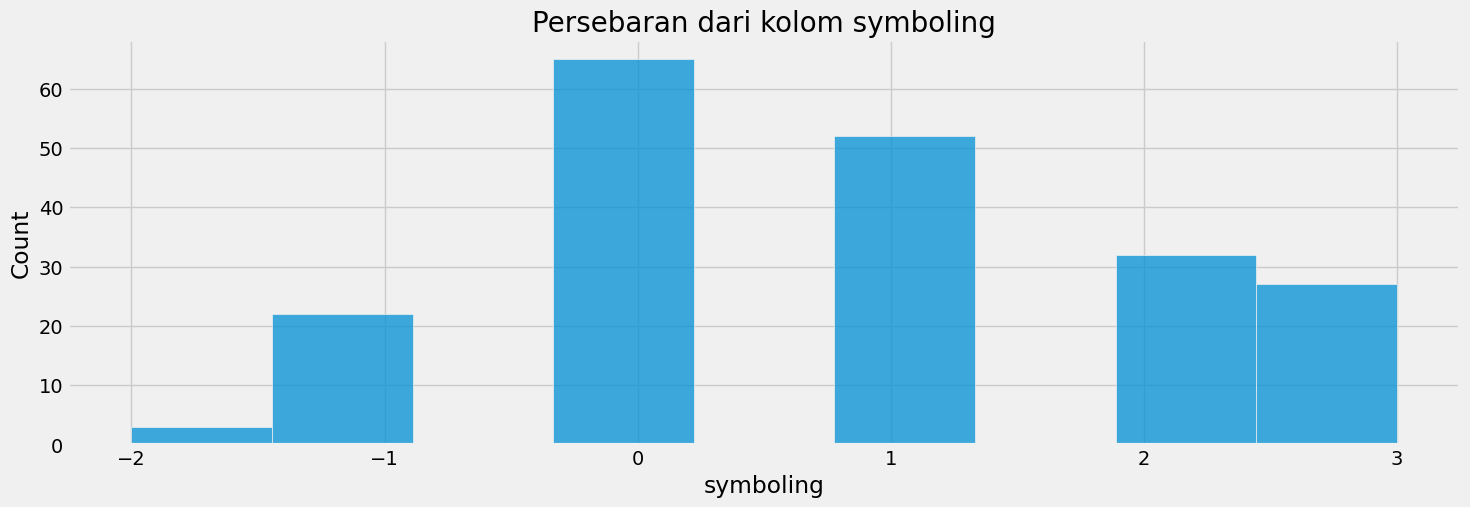

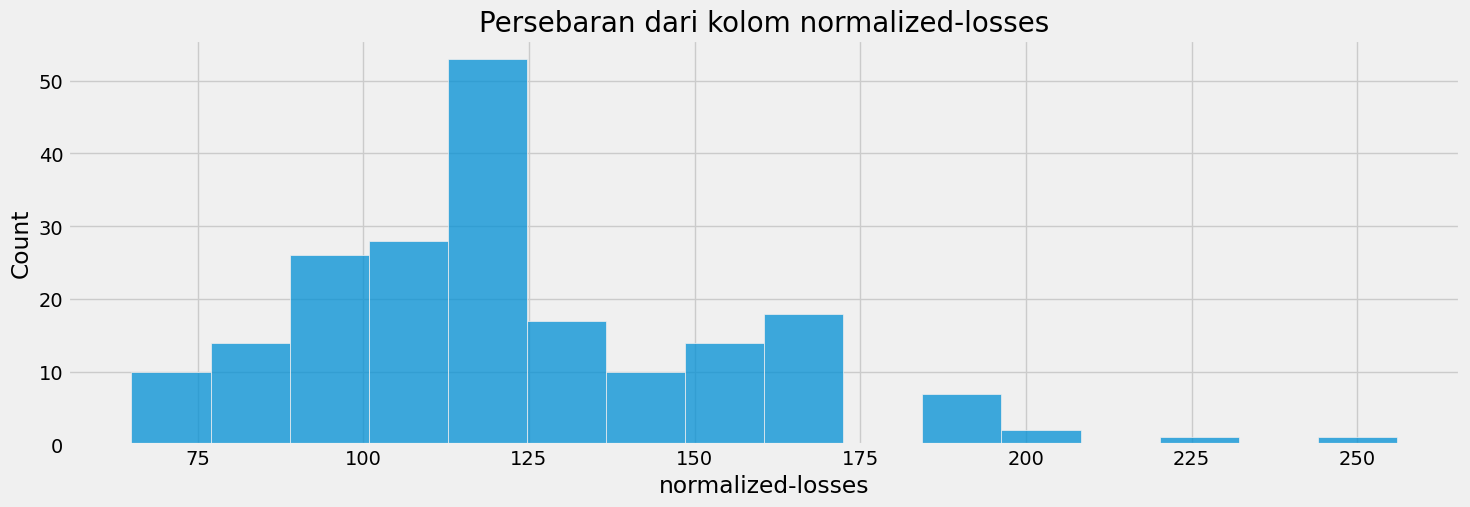

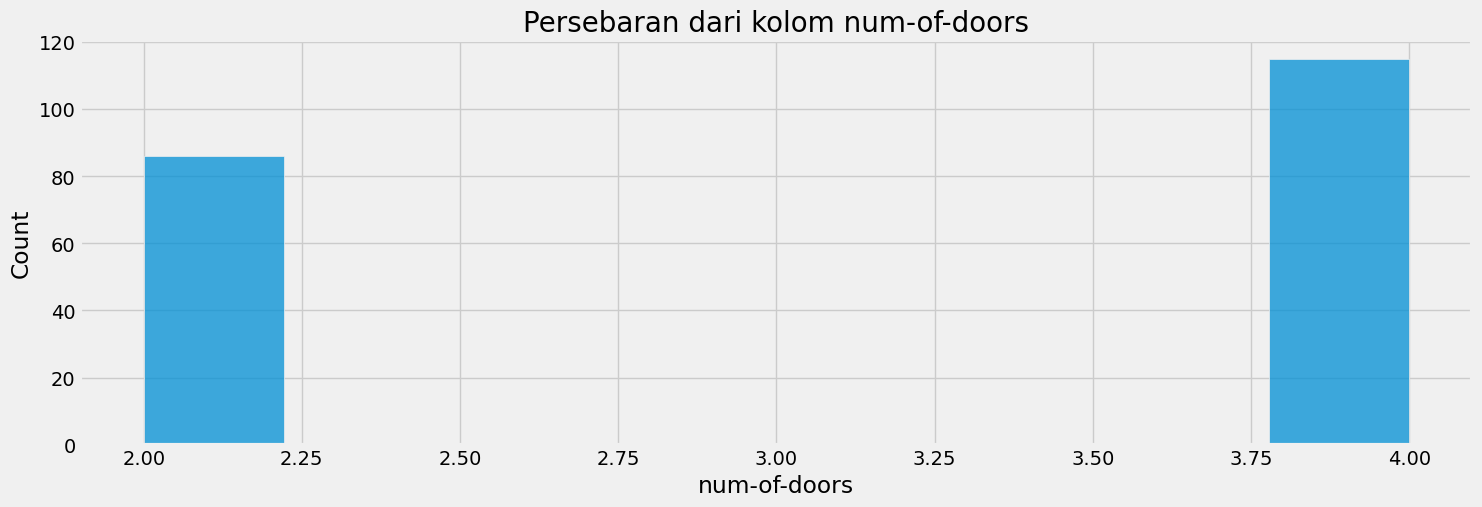

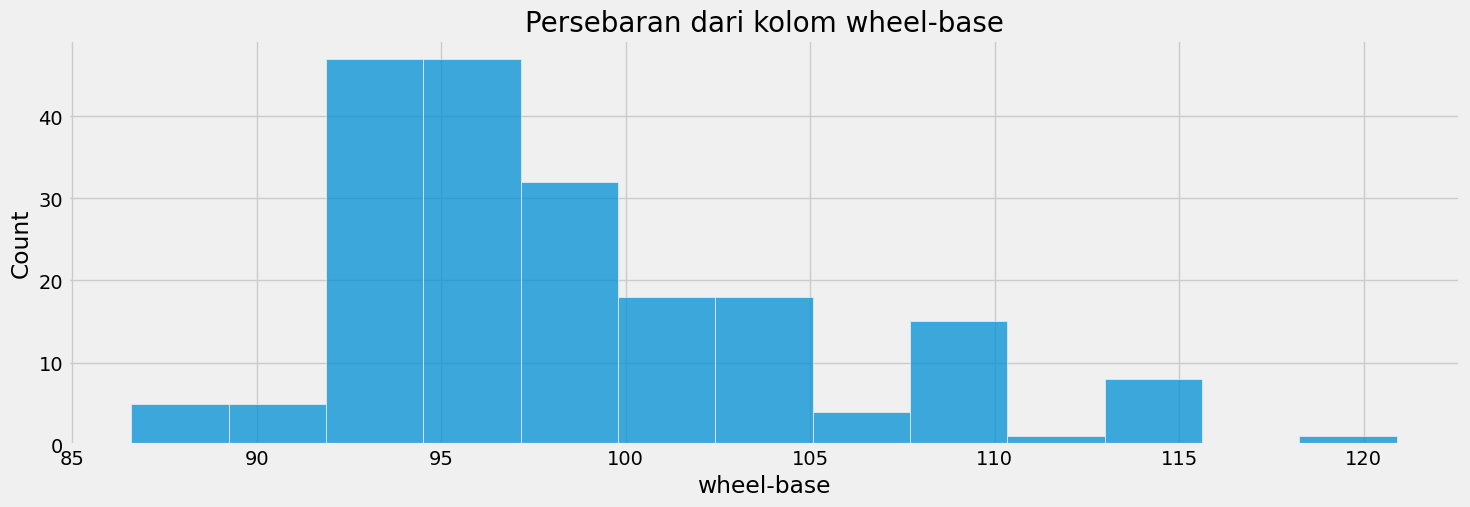

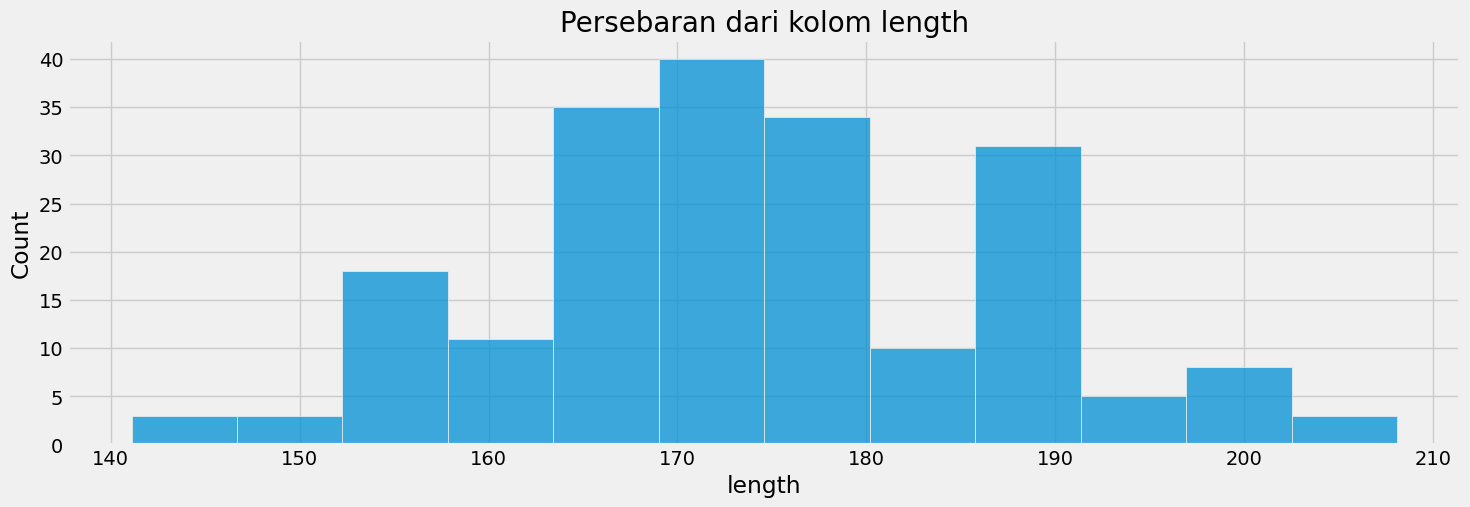

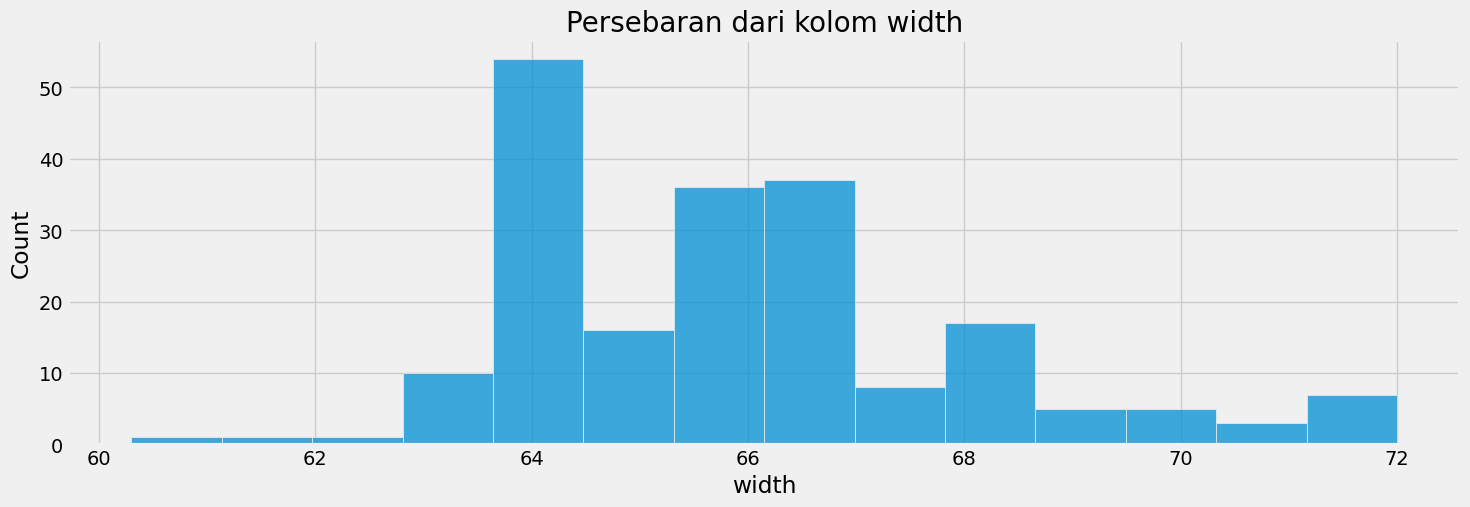

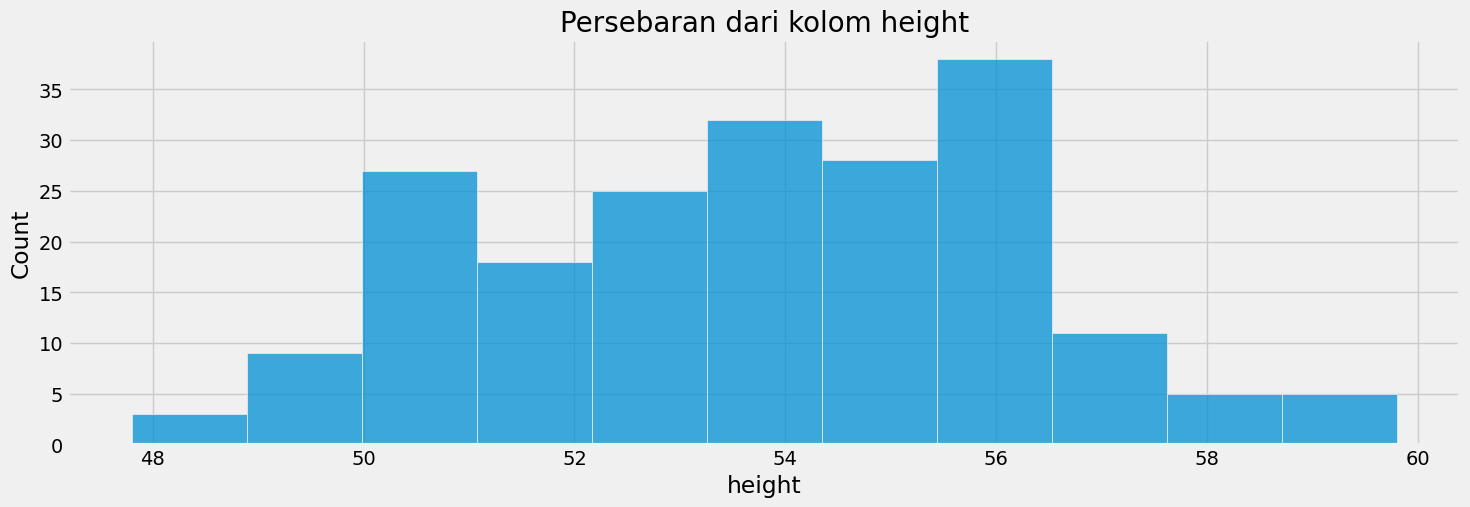

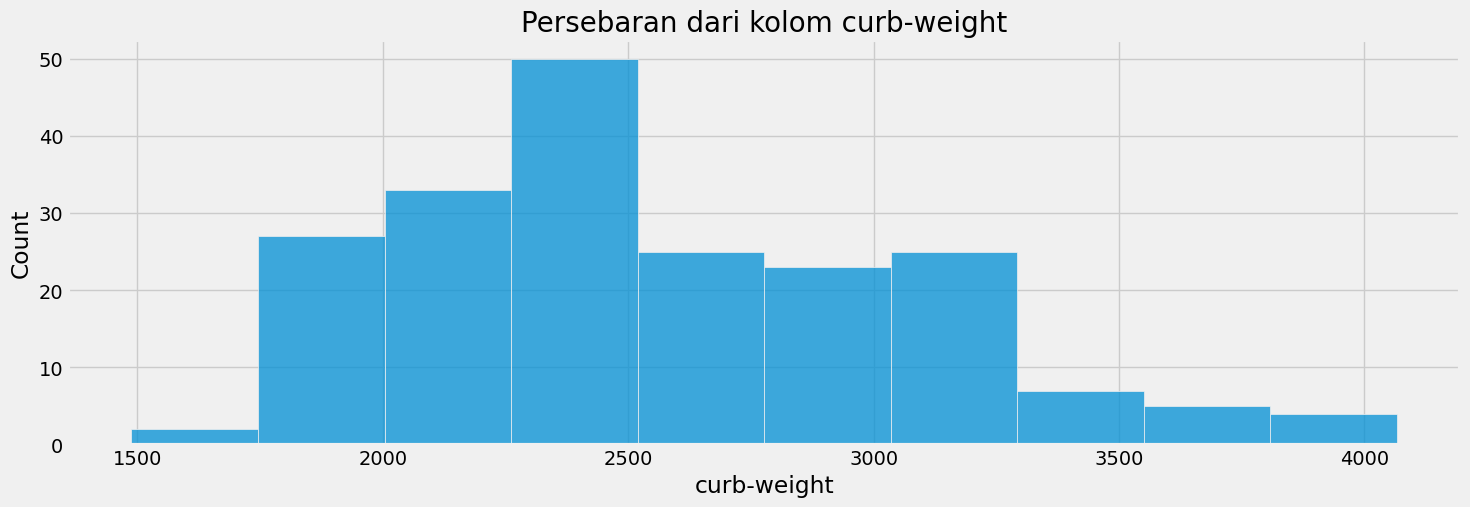

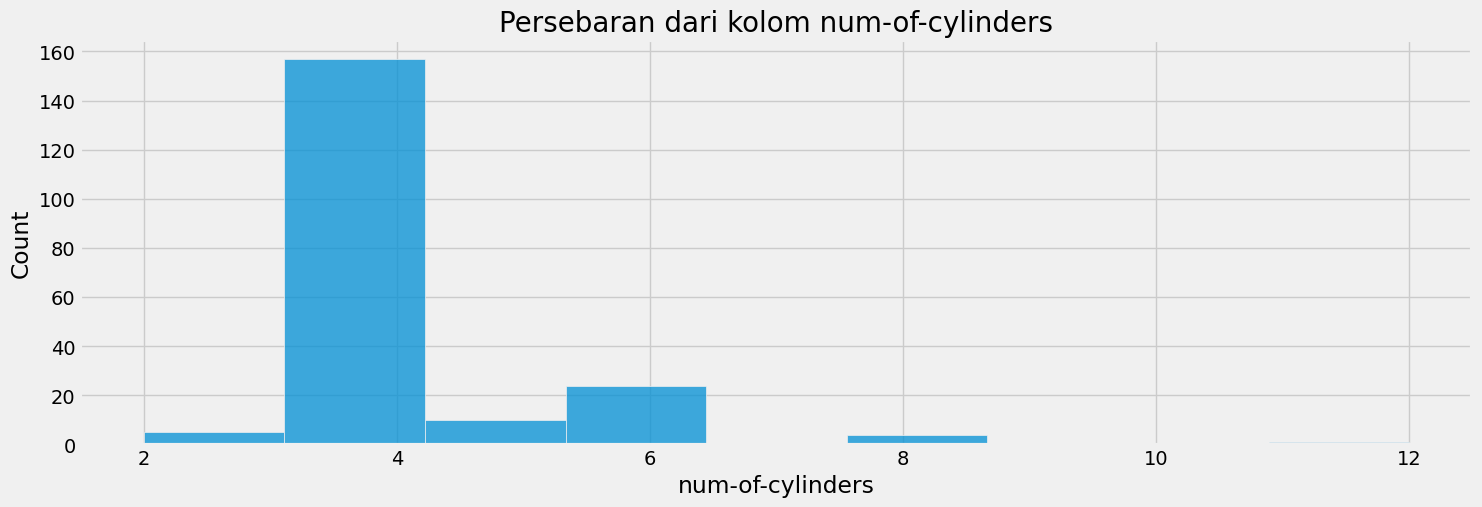

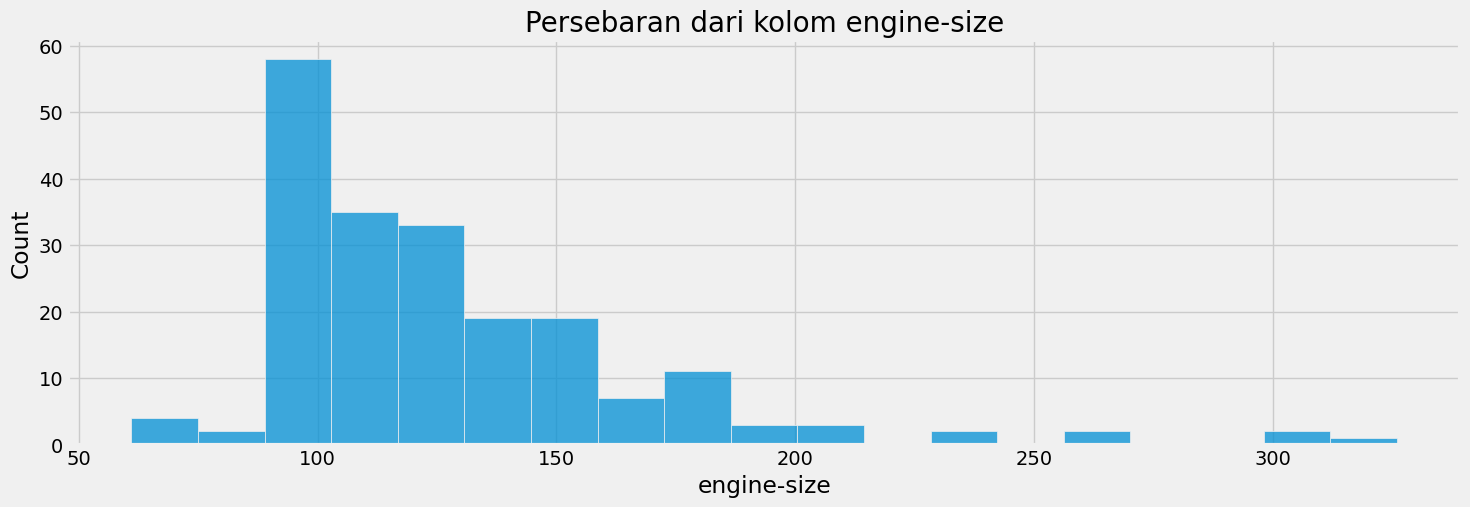

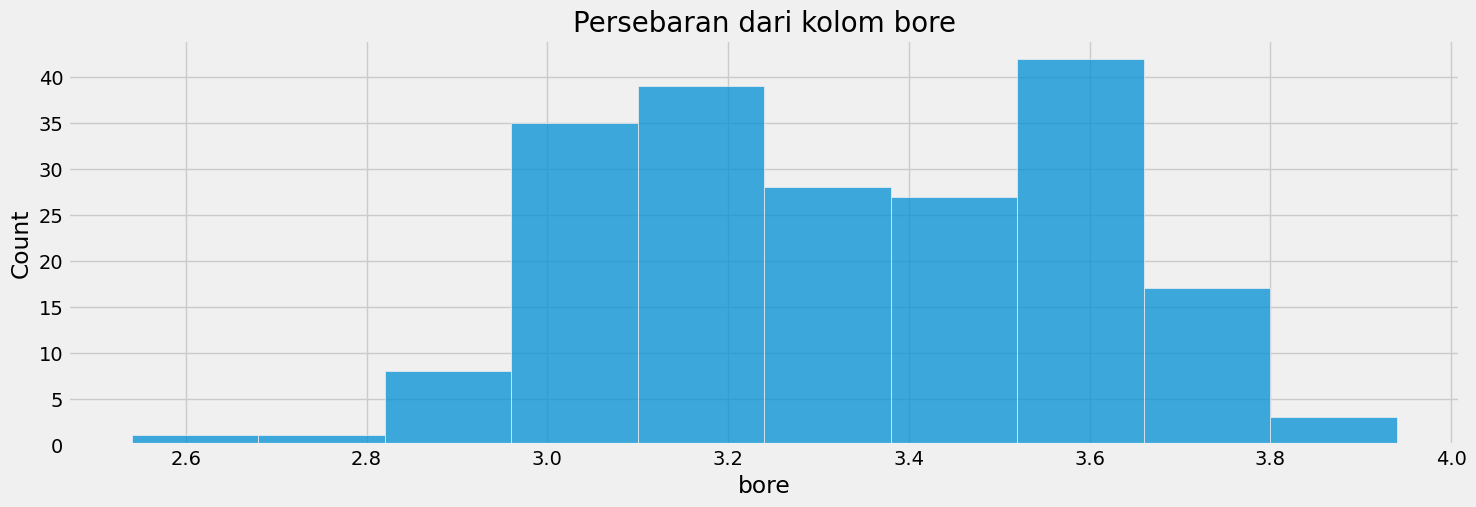

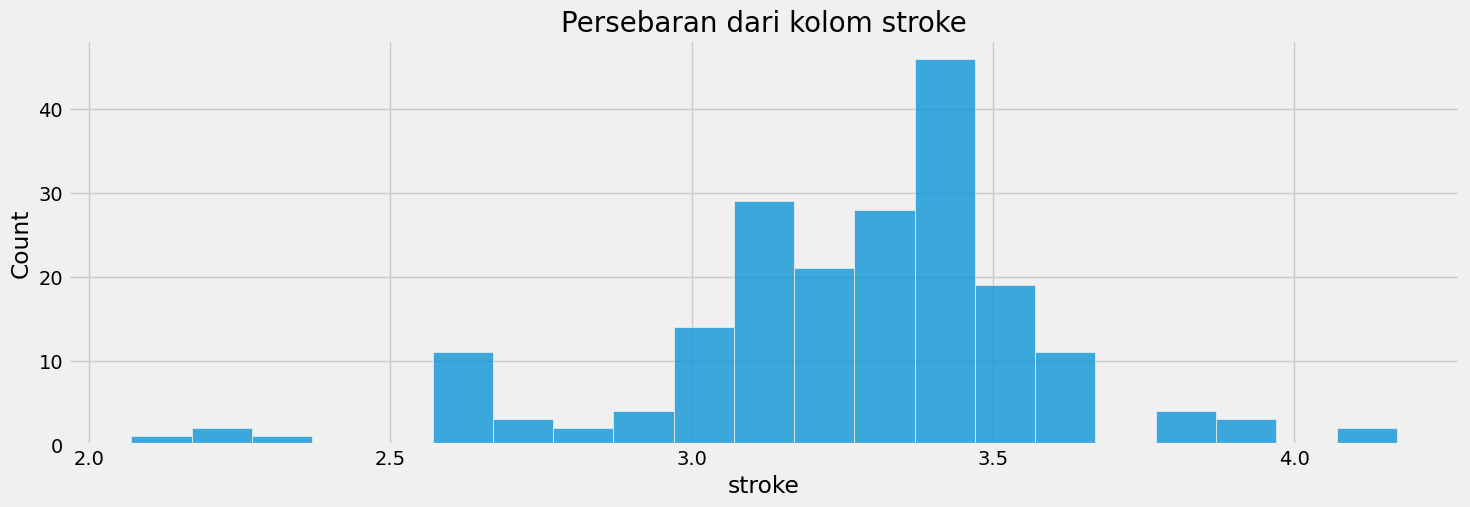

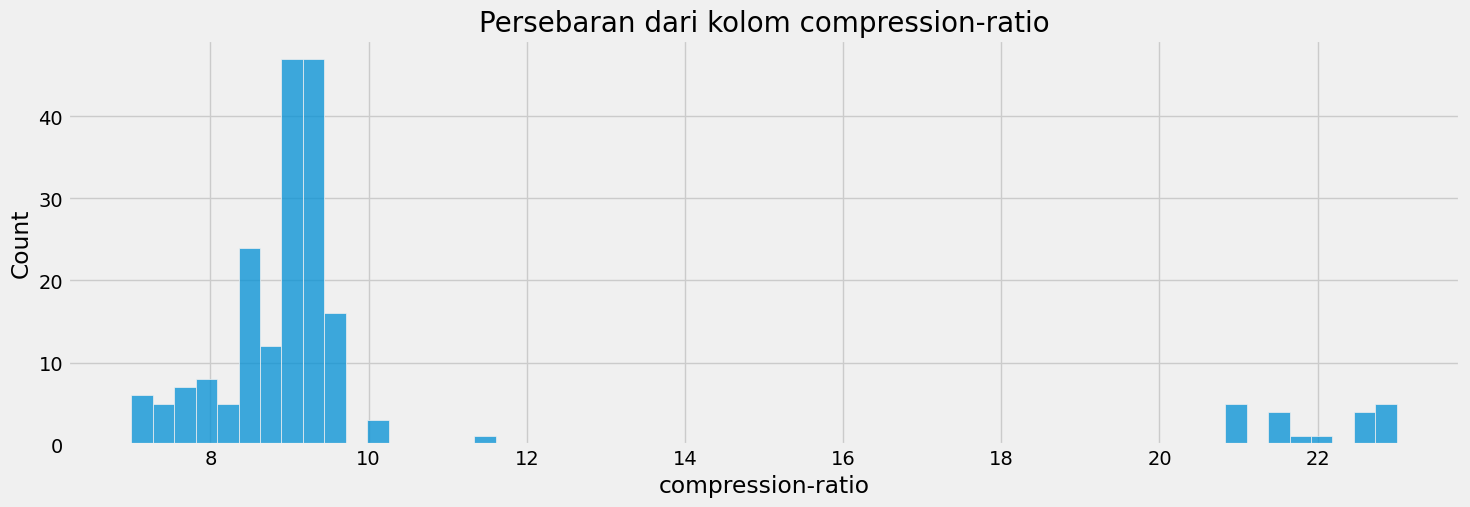

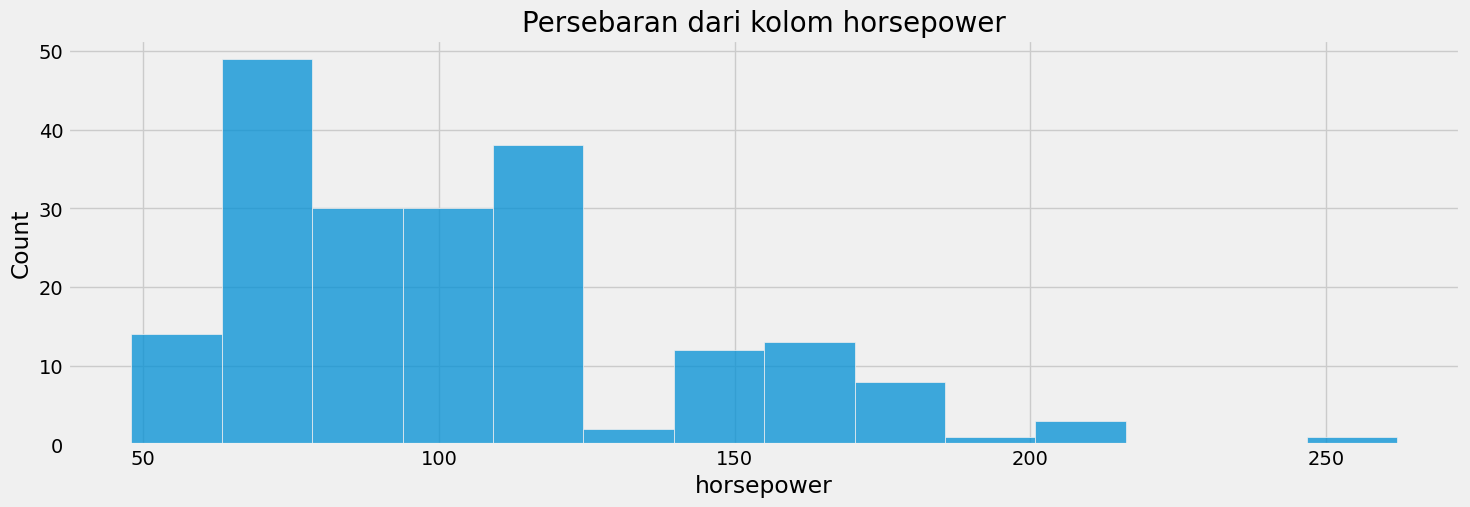

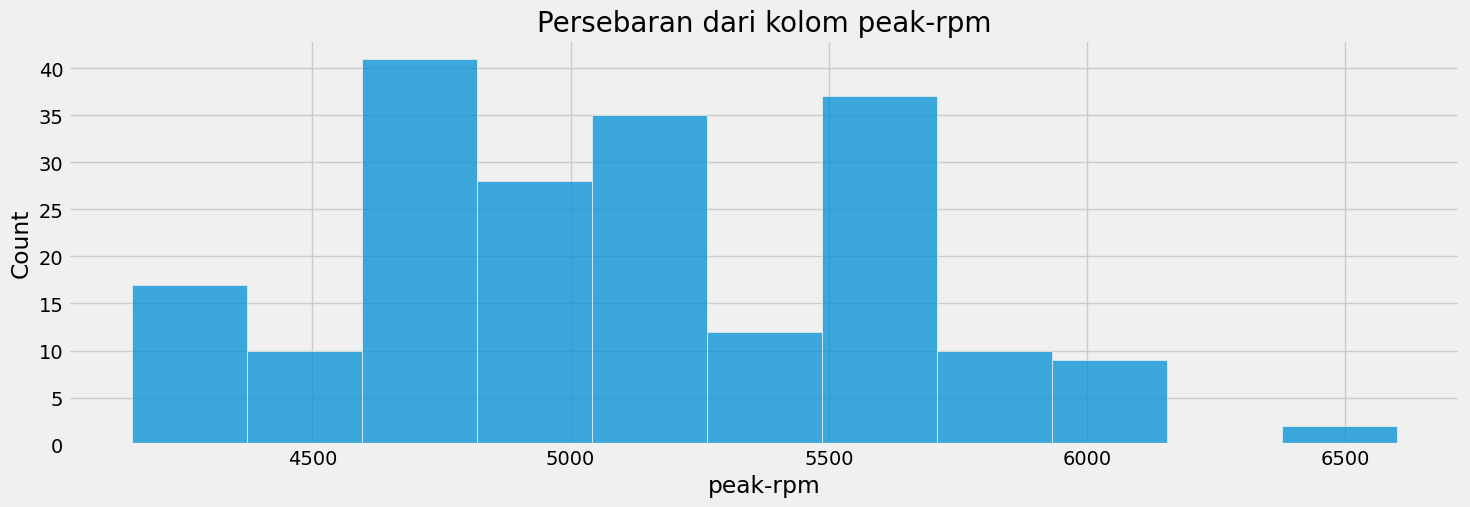

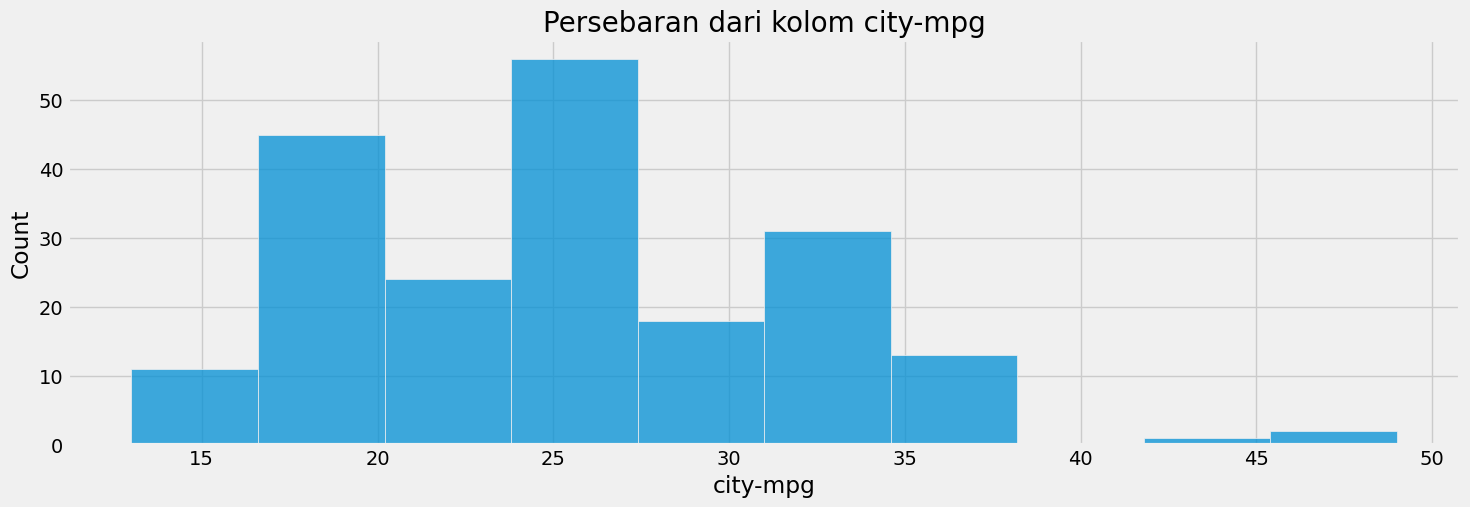

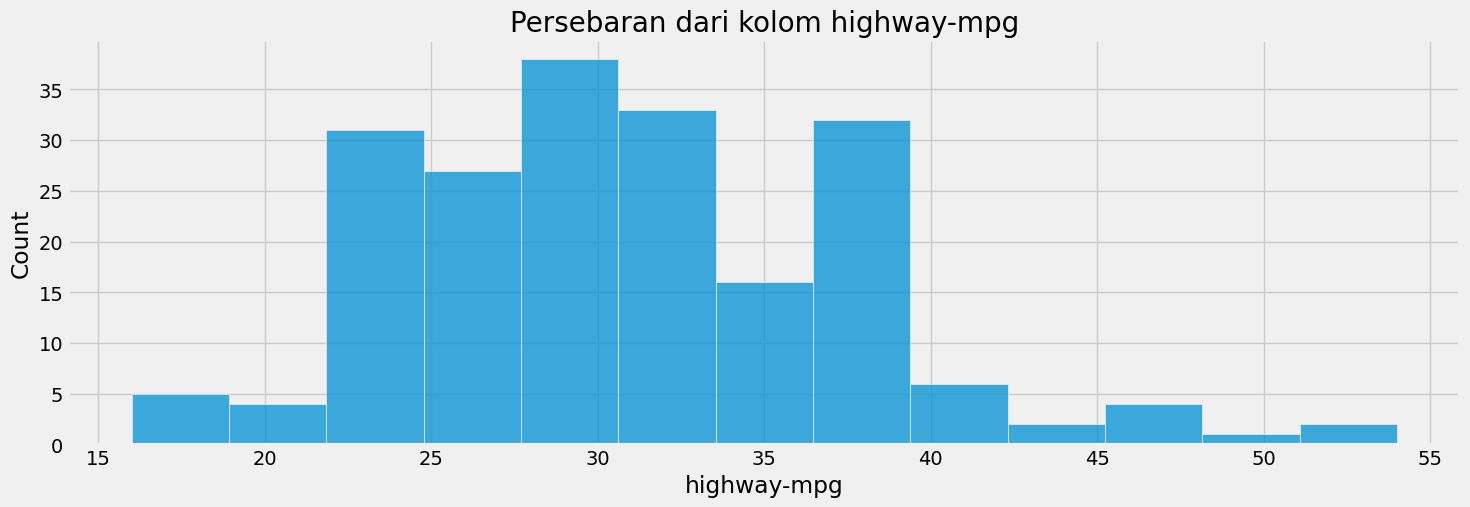

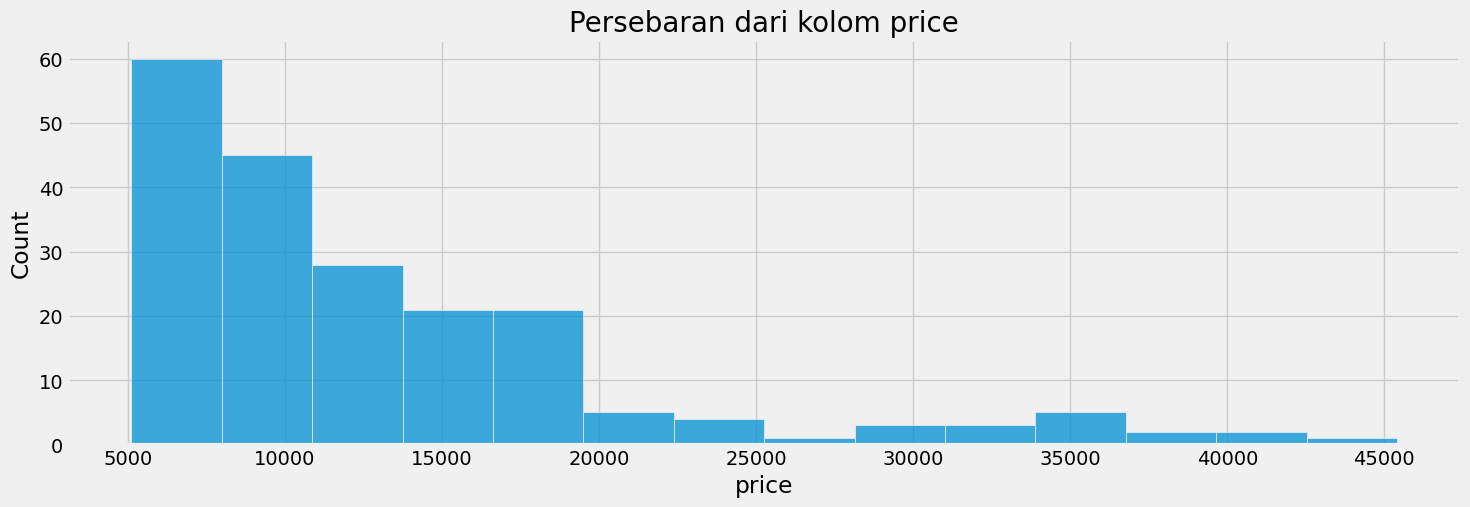

In [ ]:
for col in numerical_columns:
  plot_dist(col, auto_df_clean)

In [ ]:
object_columns = auto_df_clean.select_dtypes(include=['object'])

# Apply value_counts to each column
for column in object_columns.columns:
    counts = auto_df_clean[column].value_counts()

    if len(counts) <= 5:  # Print only if unique values are not more than 5
        print(f"Counts for {column}:\n{counts}\n")

Counts for fuel-type:
gas       181
diesel     20
Name: fuel-type, dtype: int64

Counts for aspiration:
std      165
turbo     36
Name: aspiration, dtype: int64

Counts for body-style:
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

Counts for drive-wheels:
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Counts for engine-location:
front    198
rear       3
Name: engine-location, dtype: int64



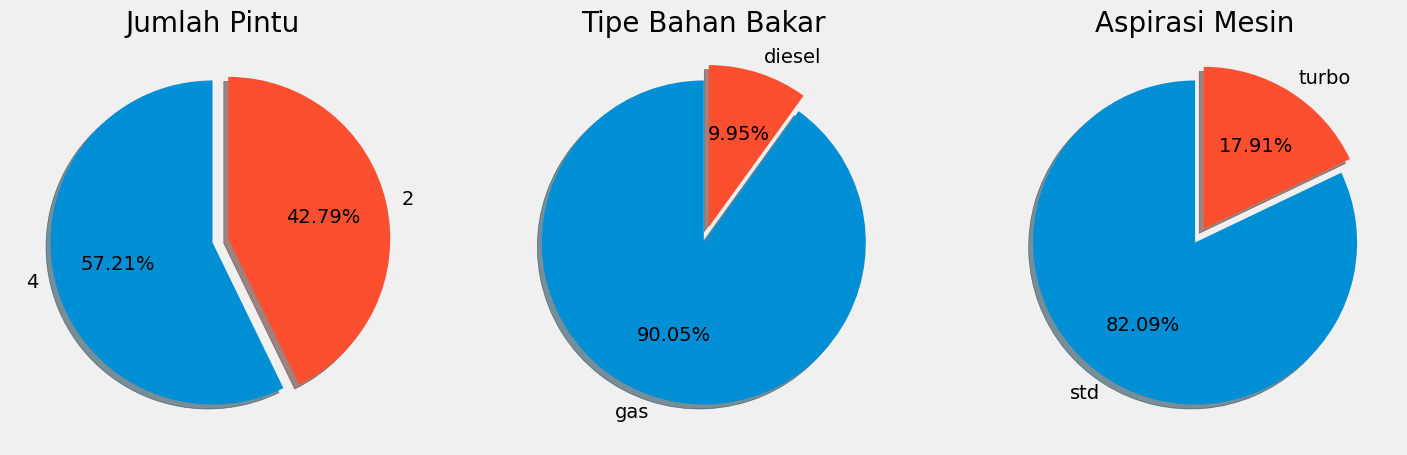

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent the share of number of doors
plt.subplot(1, 3, 1)
plt.pie(auto_df_clean['num-of-doors'].value_counts(),
        labels = auto_df_clean['num-of-doors'].value_counts().index,
        explode = [0, 0.1],
        shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Jumlah Pintu', fontsize = 20)

# plotting a pie chart to represent the share of fuel types
plt.subplot(1, 3, 2)
plt.pie(auto_df_clean['fuel-type'].value_counts(),
        labels = auto_df_clean['fuel-type'].value_counts().index,
        explode = [0, 0.1],
        shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Tipe Bahan Bakar', fontsize = 20)

# plotting a pie chart to represent the share of aspiration
plt.subplot(1, 3, 3)
plt.pie(auto_df_clean['aspiration'].value_counts(),
        labels = auto_df_clean['aspiration'].value_counts().index,
        explode = [0, 0.1],
        shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Aspirasi Mesin', fontsize = 20)

plt.show()

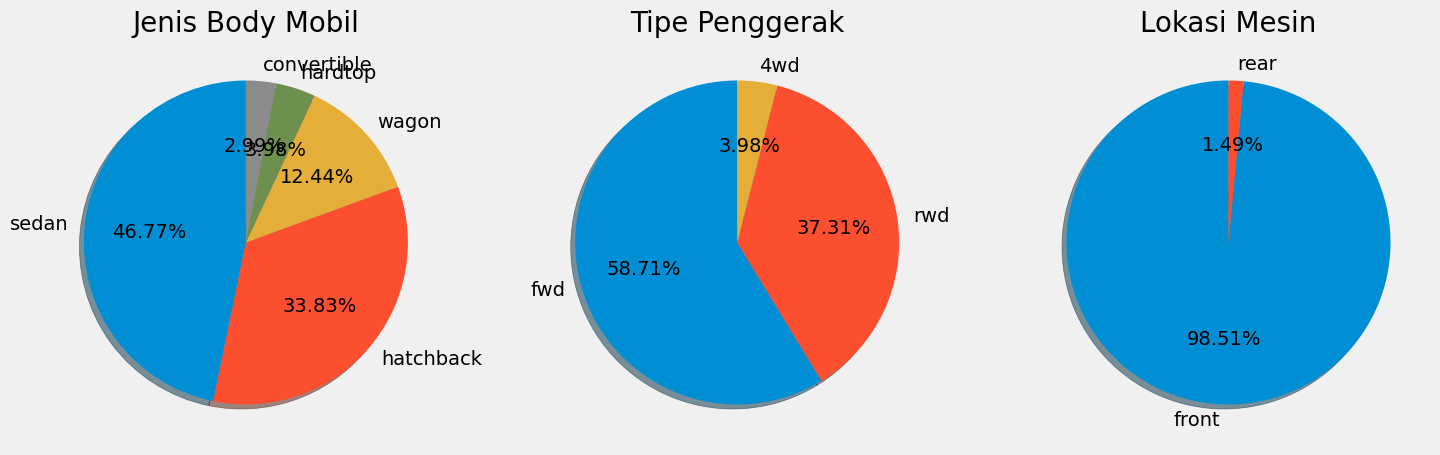

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent the share of body style
plt.subplot(1, 3, 1)
plt.pie(auto_df_clean['body-style'].value_counts(),
        labels = auto_df_clean['body-style'].value_counts().index,
        #explode = [0, 0.1],
        shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Jenis Body Mobil', fontsize = 20)

# plotting a pie chart to represent the share of drive wheels
plt.subplot(1, 3, 2)
plt.pie(auto_df_clean['drive-wheels'].value_counts(),
        labels = auto_df_clean['drive-wheels'].value_counts().index,
        #explode = [0, 0.1],
        shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Tipe Penggerak', fontsize = 20)

# plotting a pie chart to represent the share of engine location
plt.subplot(1, 3, 3)
plt.pie(auto_df_clean['engine-location'].value_counts(),
        labels = auto_df_clean['engine-location'].value_counts().index,
        #explode = [0, 0.1],
        shadow = True,
        autopct = '%.2f%%', startangle = 90)
plt.title('Lokasi Mesin', fontsize = 20)

plt.show()

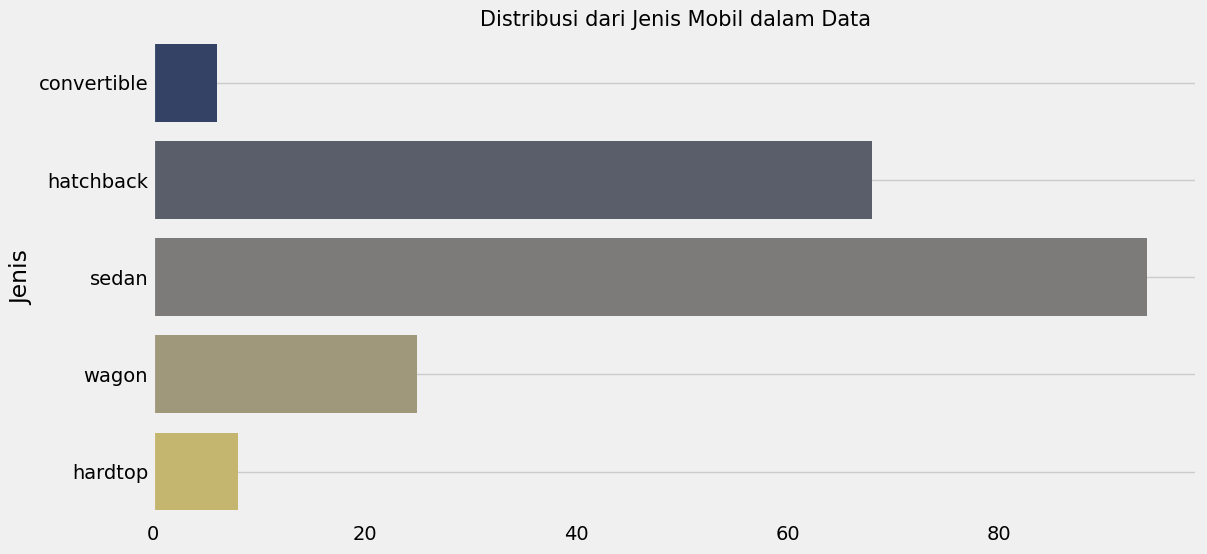

In [ ]:
# lets check different body types but more capable to be seen

plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y=auto_df_clean['body-style'], hue=auto_df_clean['body-style'], palette='cividis', orient='v', legend=False)
plt.xlabel('')
plt.ylabel('Jenis')
plt.title('Distribusi dari Jenis Mobil dalam Data', fontsize=15)
plt.grid()

plt.show()

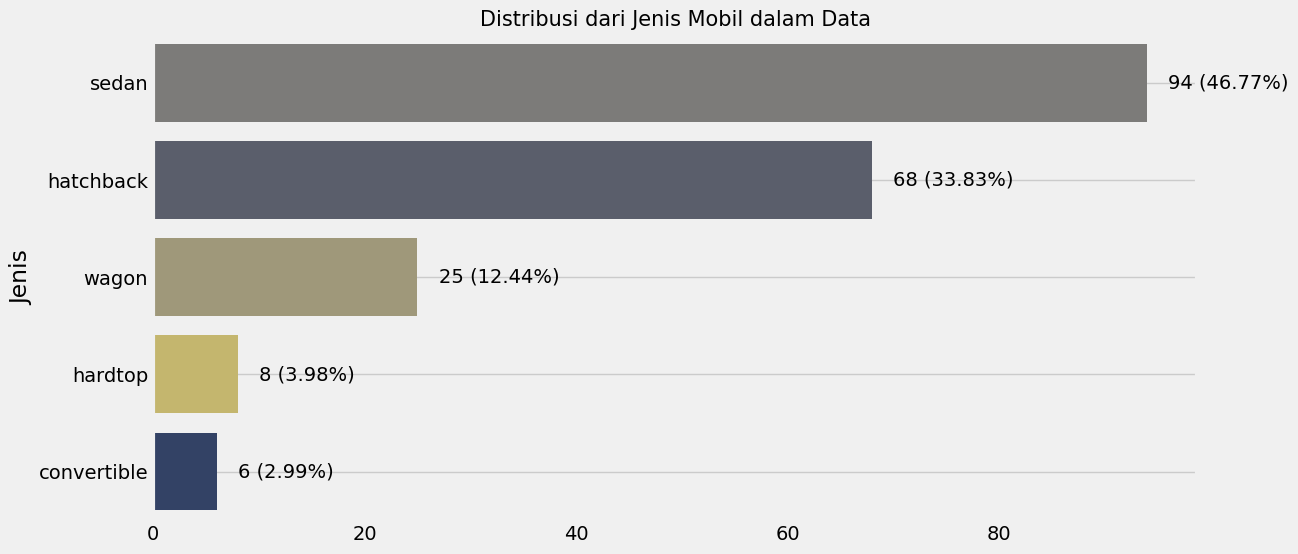

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y=auto_df_clean['body-style'], order=auto_df_clean['body-style'].value_counts().index,
              palette='cividis', hue=auto_df_clean['body-style'], orient='v')
plt.xlabel('')
plt.ylabel('Jenis')
plt.title('Distribusi dari Jenis Mobil dalam Data', fontsize=15)
plt.grid()

# Add data labels
counts = auto_df_clean['body-style'].value_counts()
total_count = len(auto_df_clean['body-style'])

for i, count in enumerate(counts):
    percentage = count / total_count * 100
    plt.text(count + 2, i, f"{count} ({percentage:.2f}%)", ha='left', va='center')

plt.show()

## Bivariate Analysis

Analisis Bivariat adalah salah satu bentuk analisis kuantitatif yang paling sederhana. Ini melibatkan analisis dua variabel, dengan tujuan menentukan hubungan empiris di antara keduanya. Analisis Bivariat dapat membantu dalam pengujian hipotesis sederhana tentang asosiasi.

* Jenis Analisis Bivariat
    * Kategorikal vs Kategorikal
    * Kategorikal vs Numerikal
    * Numerikal vs Numerikal
    
* Pertama, kita akan melakukan Analisis Kategorikal vs Kategorikal Stacked atau Clustered Bar/Column Chart.
* Kedua, kita akan melakukan Analisis Kategorikal vs Numerikal menggunakan Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, dll.
* Terakhir, kita akan melakukan Analisis Numerikal vs Numerikal menggunakan Scatter plots.

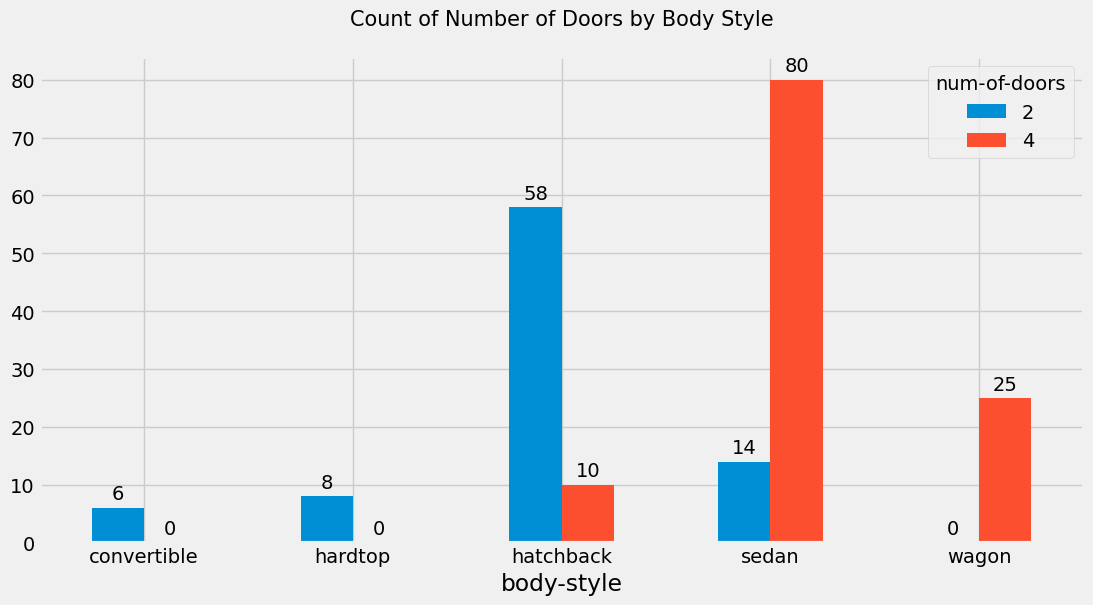

In [ ]:
# Group by 'body-style' and 'num-of-doors', then count occurrences
count_table = auto_df_clean.groupby(['body-style', 'num-of-doors']).size().unstack()

# Plot the bar chart
ax = count_table.plot(kind='bar', stacked=False)
plt.title('Count of Number of Doors by Body Style\n', fontsize=15)

# Add data labels
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set x-axis labels rotation to 0 degrees
plt.xticks(rotation=0)

plt.show()

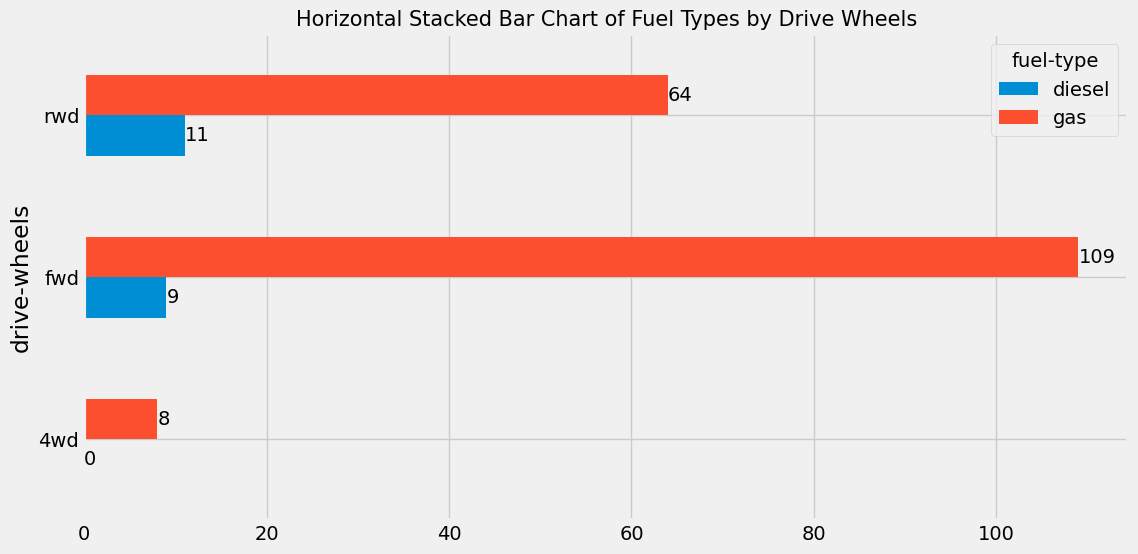

In [ ]:
# Group by 'drive-wheels' and 'fuel-type', then count occurrences
count_table = auto_df_clean.groupby(['drive-wheels', 'fuel-type']).size().unstack()

# Plot the horizontal stacked bar chart
ax = count_table.plot(kind='barh')
plt.title('Horizontal Stacked Bar Chart of Fuel Types by Drive Wheels', fontsize=15)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{int(width)}', ha='left', va='center')

plt.show()

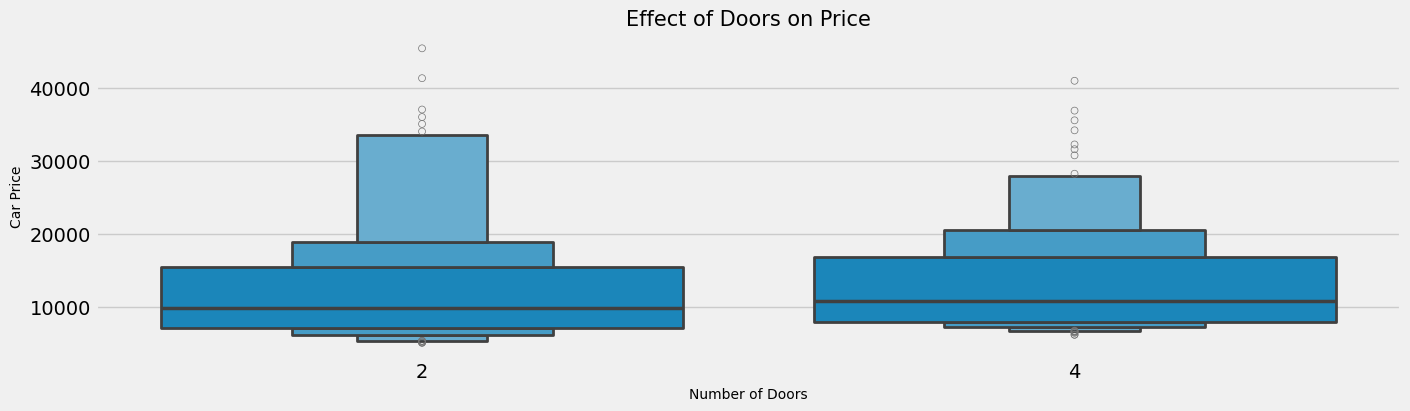

In [ ]:
# Effect of Doors on the Price

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(data=auto_df_clean, x='num-of-doors', y='price')
plt.title('Effect of Doors on Price', fontsize = 15)
plt.xlabel('Number of Doors', fontsize = 10)
plt.ylabel('Car Price', fontsize = 10)
plt.xticks()
plt.show()

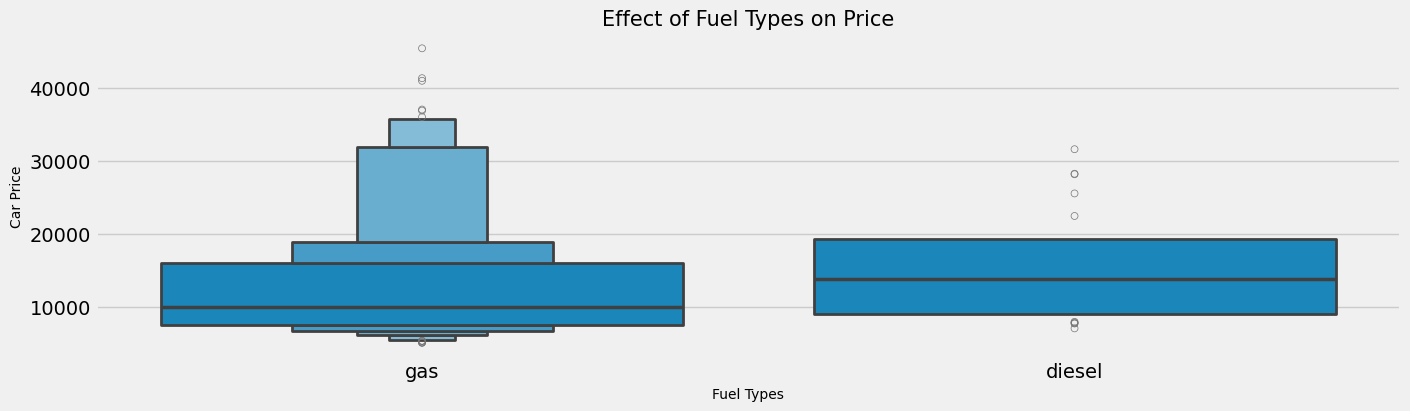

In [ ]:
# Effect of Doors on the Price

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(data=auto_df_clean, x='fuel-type', y='price')
plt.title('Effect of Fuel Types on Price', fontsize = 15)
plt.xlabel('Fuel Types', fontsize = 10)
plt.ylabel('Car Price', fontsize = 10)
plt.xticks()
plt.show()

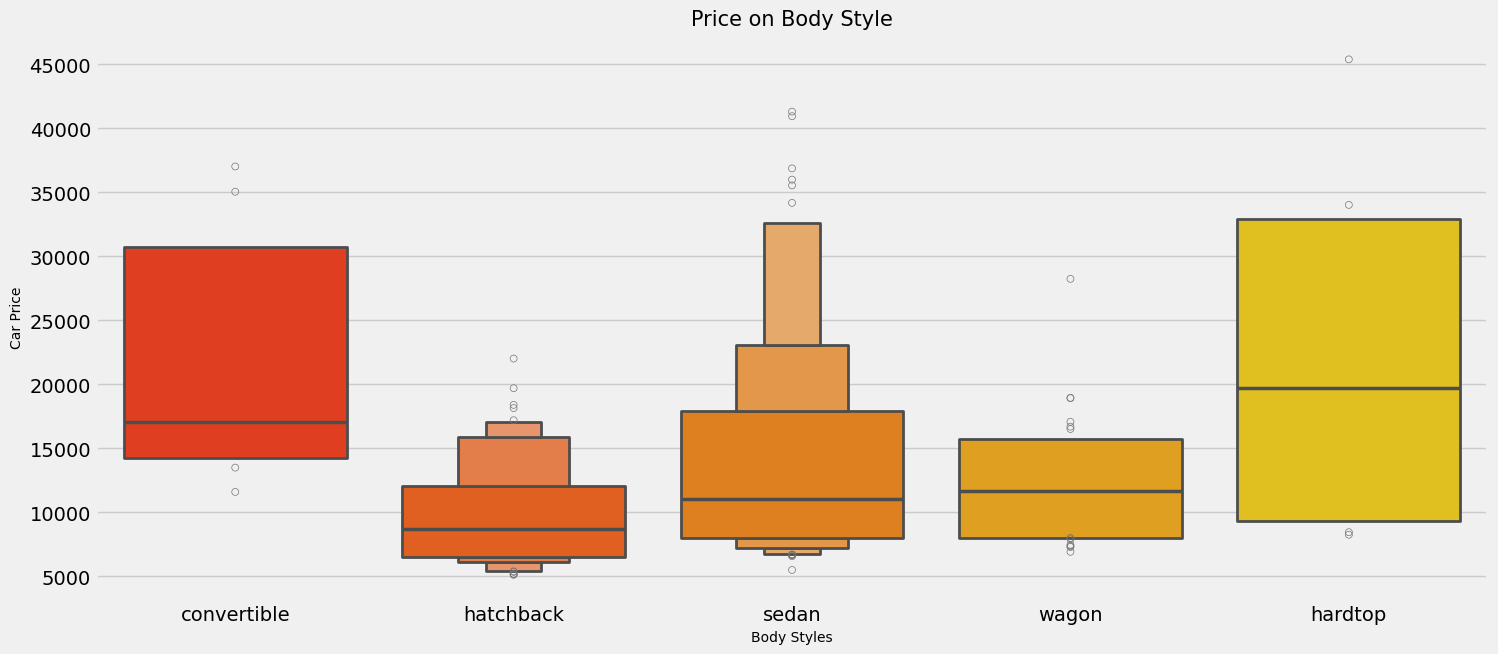

In [ ]:
# Body Style vs Price

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxenplot(data=auto_df_clean, x='body-style', y='price', hue='body-style', palette='autumn', legend=False)
plt.title('Price on Body Style', fontsize=15)
plt.ylabel('Car Price', fontsize=10)
plt.xlabel('Body Styles', fontsize=10)
plt.show()

In [ ]:
numerical_columns = auto_df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns)

['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


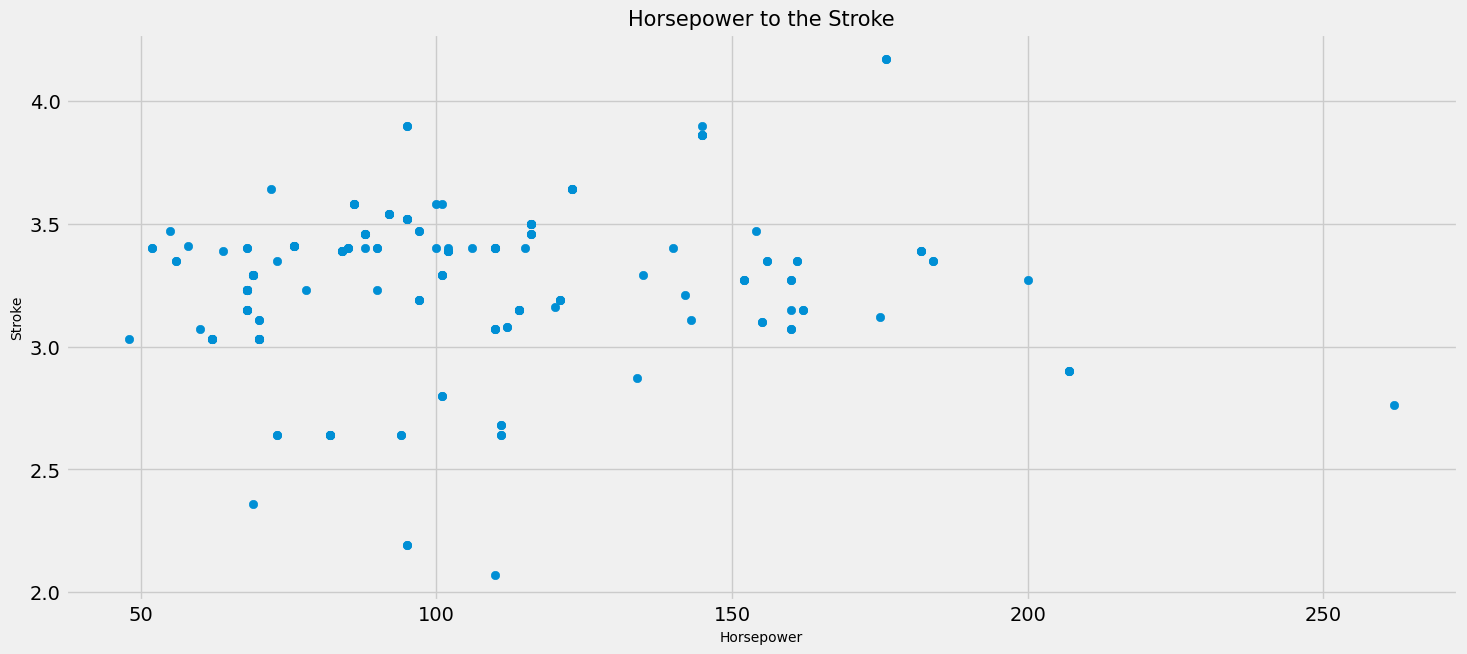

In [ ]:
plt.rcParams['figure.figsize'] = (16, 7)
plt.scatter(auto_df_clean['horsepower'], auto_df_clean['stroke'])
plt.title('Horsepower to the Stroke', fontsize = 15)
plt.ylabel('Stroke', fontsize = 10)
plt.xlabel('Horsepower', fontsize = 10)
plt.show()

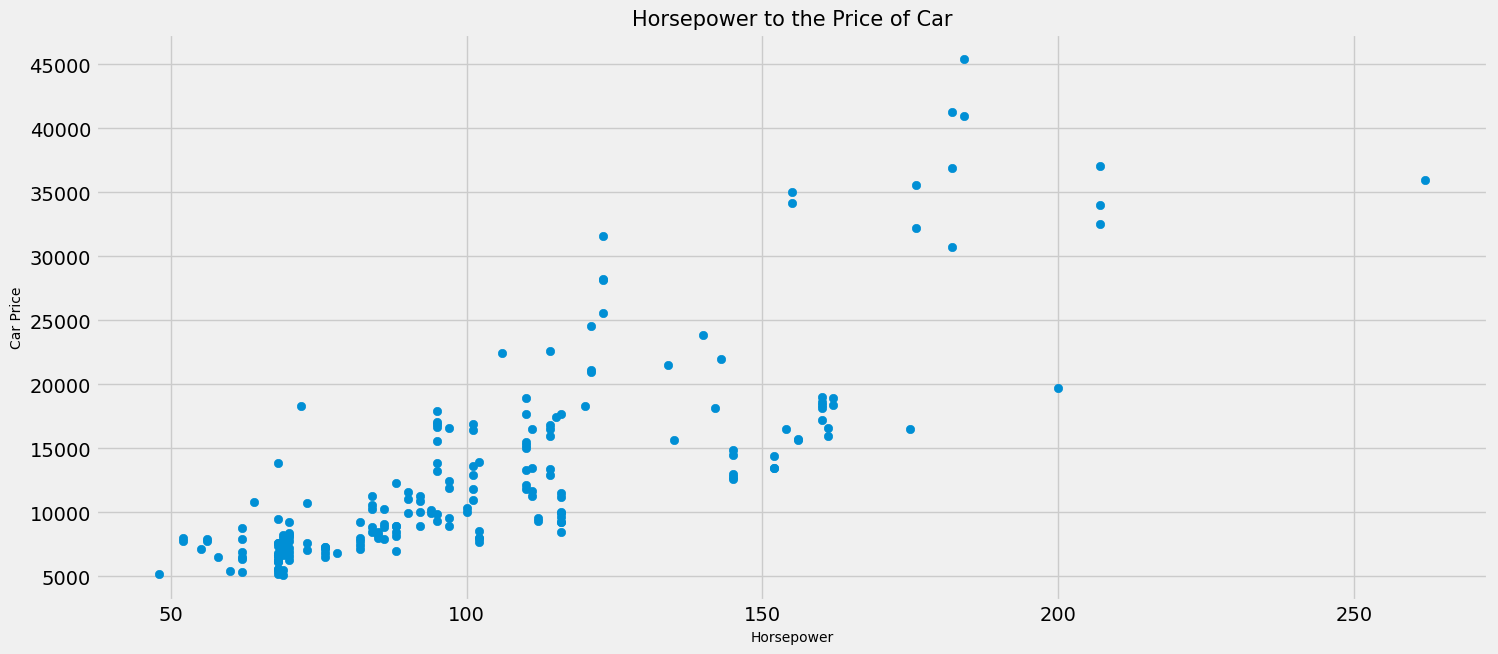

In [ ]:
#age to the length of service

plt.rcParams['figure.figsize'] = (16, 7)
plt.scatter(auto_df_clean['horsepower'], auto_df_clean['price'])
plt.title('Horsepower to the Price of Car', fontsize = 15)
plt.ylabel('Car Price', fontsize = 10)
plt.xlabel('Horsepower', fontsize = 10)
plt.show()

## Multivariate Analysis

Analisis multivariat didasarkan pada prinsip-prinsip statistik multivariat, yang melibatkan pengamatan dan analisis lebih dari satu variabel hasil statistik pada suatu waktu.

In [ ]:
auto_df_clean.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0


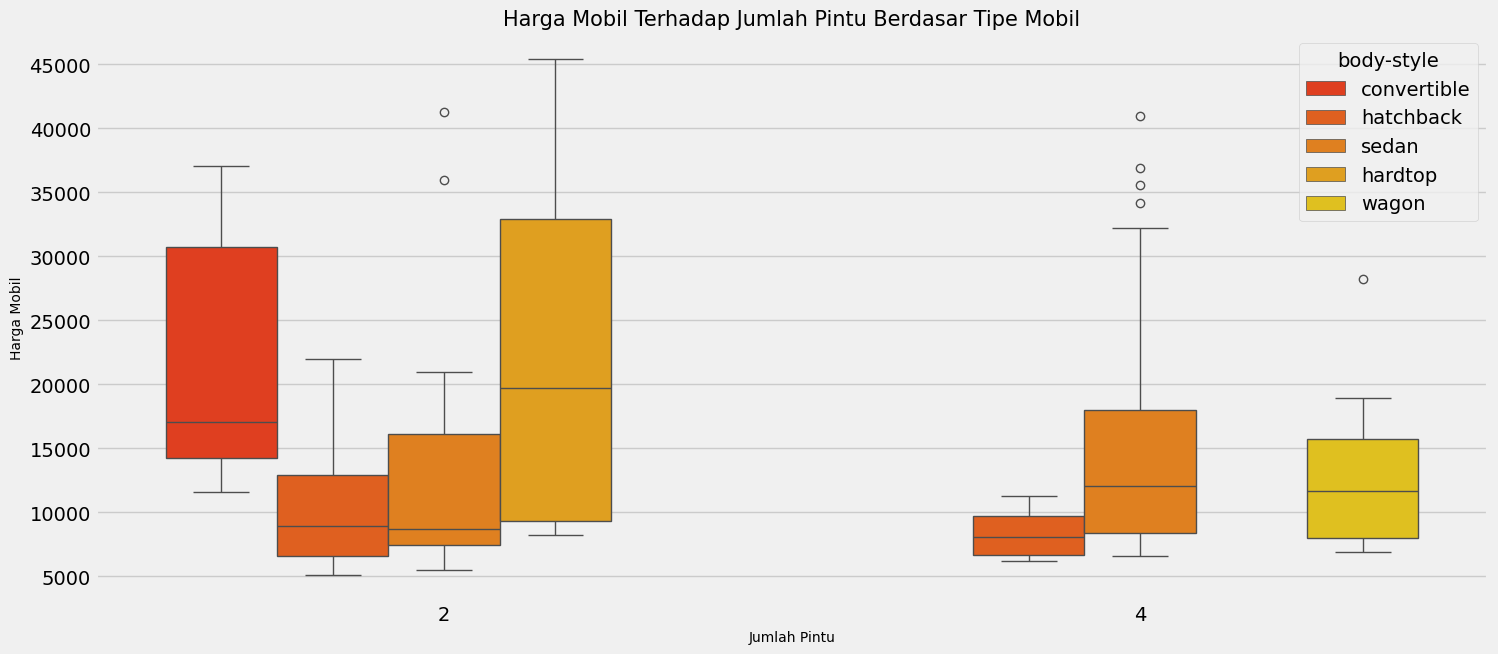

In [ ]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(x = 'num-of-doors', y = 'price',
            hue='body-style', data = auto_df_clean,
            palette = 'autumn')
plt.title('Harga Mobil Terhadap Jumlah Pintu Berdasar Tipe Mobil', fontsize = 15)
plt.ylabel('Harga Mobil', fontsize = 10)
plt.xlabel('Jumlah Pintu', fontsize = 10)
plt.show()

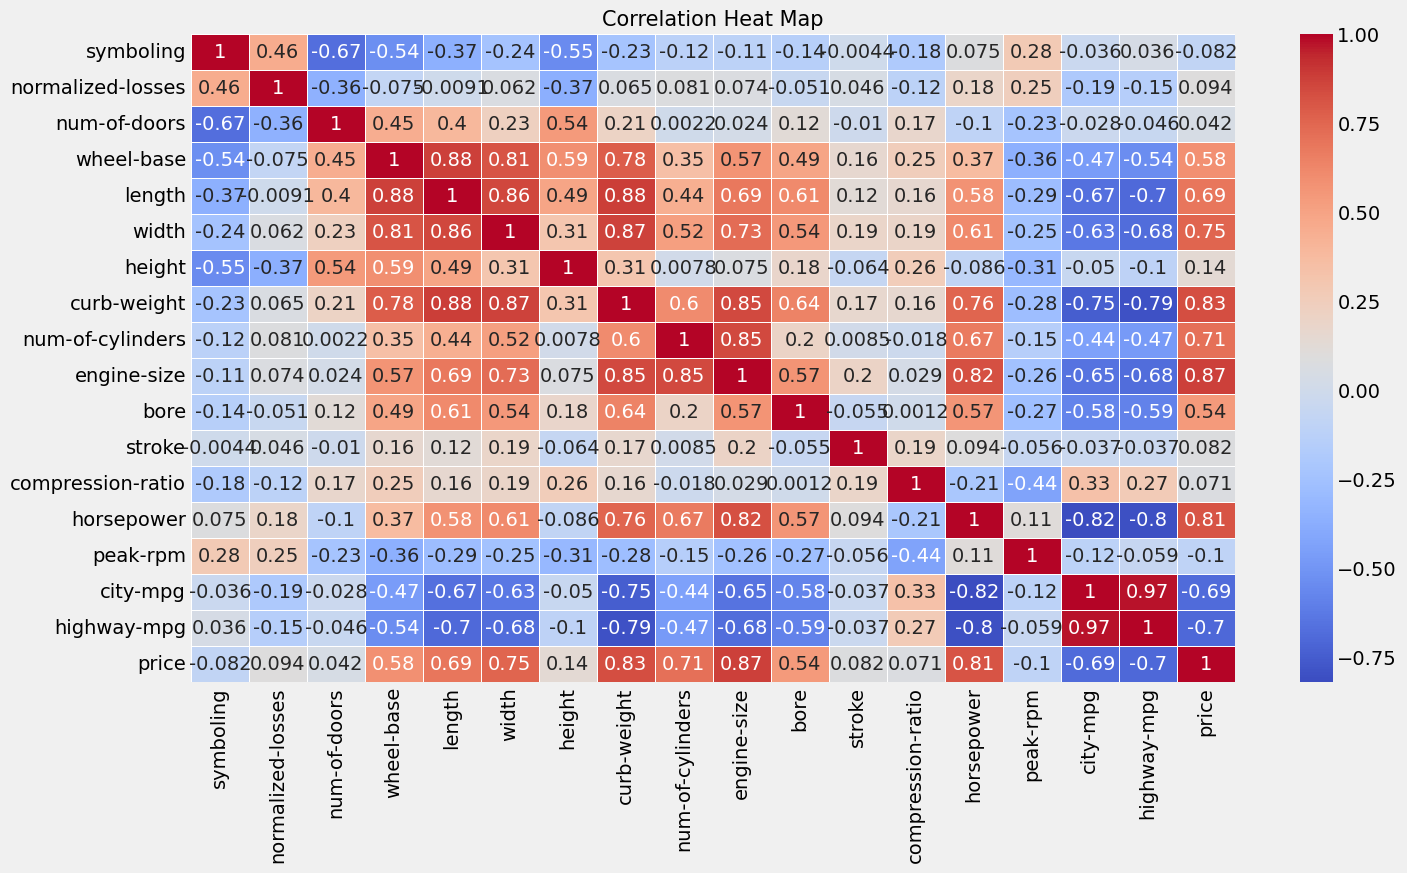

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(auto_df_clean.corr(), annot = True, linewidth = 0.5, cmap = 'coolwarm')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

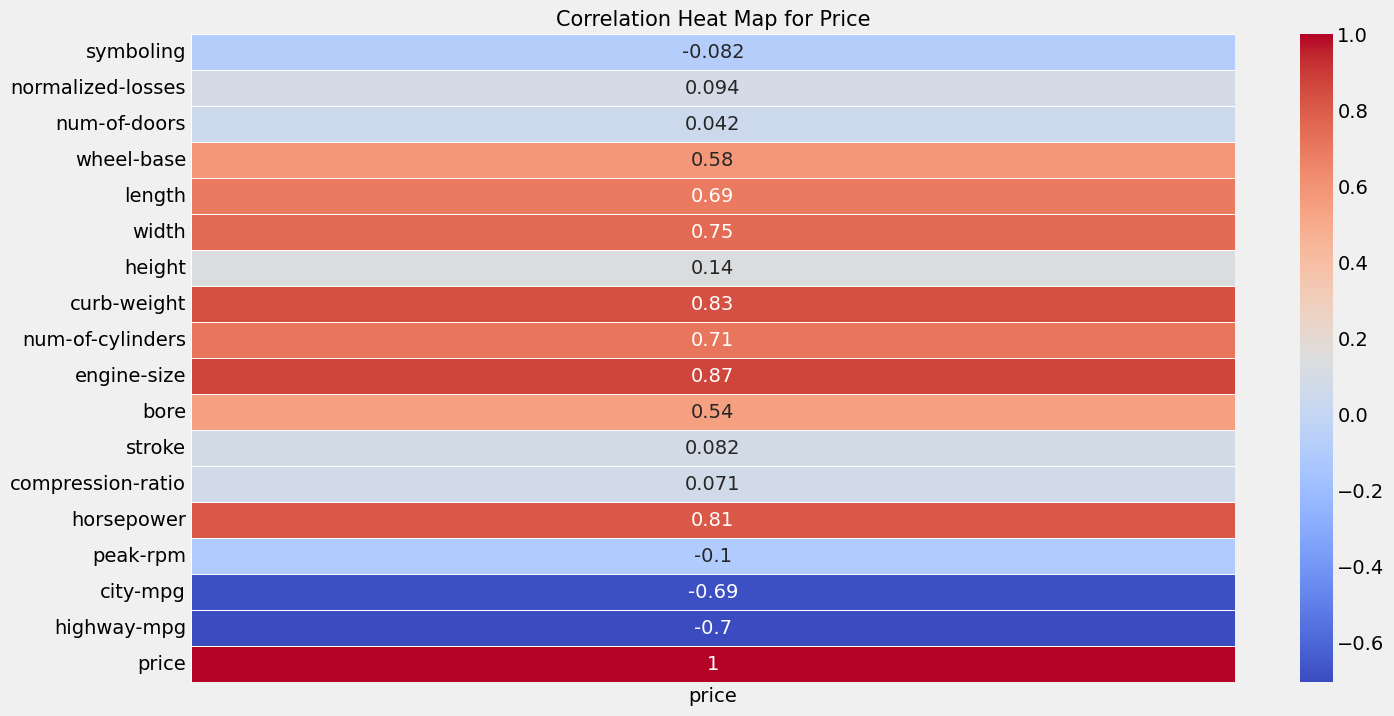

In [ ]:
price_correlation = auto_df_clean.corr()['price']

# Create a DataFrame with 'price' correlation values
price_correlation_df = pd.DataFrame(price_correlation)

# Create a heatmap for 'price' correlation
sns.heatmap(price_correlation_df, annot=True, linewidth=0.5, cmap='coolwarm')
plt.title('Correlation Heat Map for Price', fontsize=15)
plt.show()

In [ ]:
!pip install scikit-learn

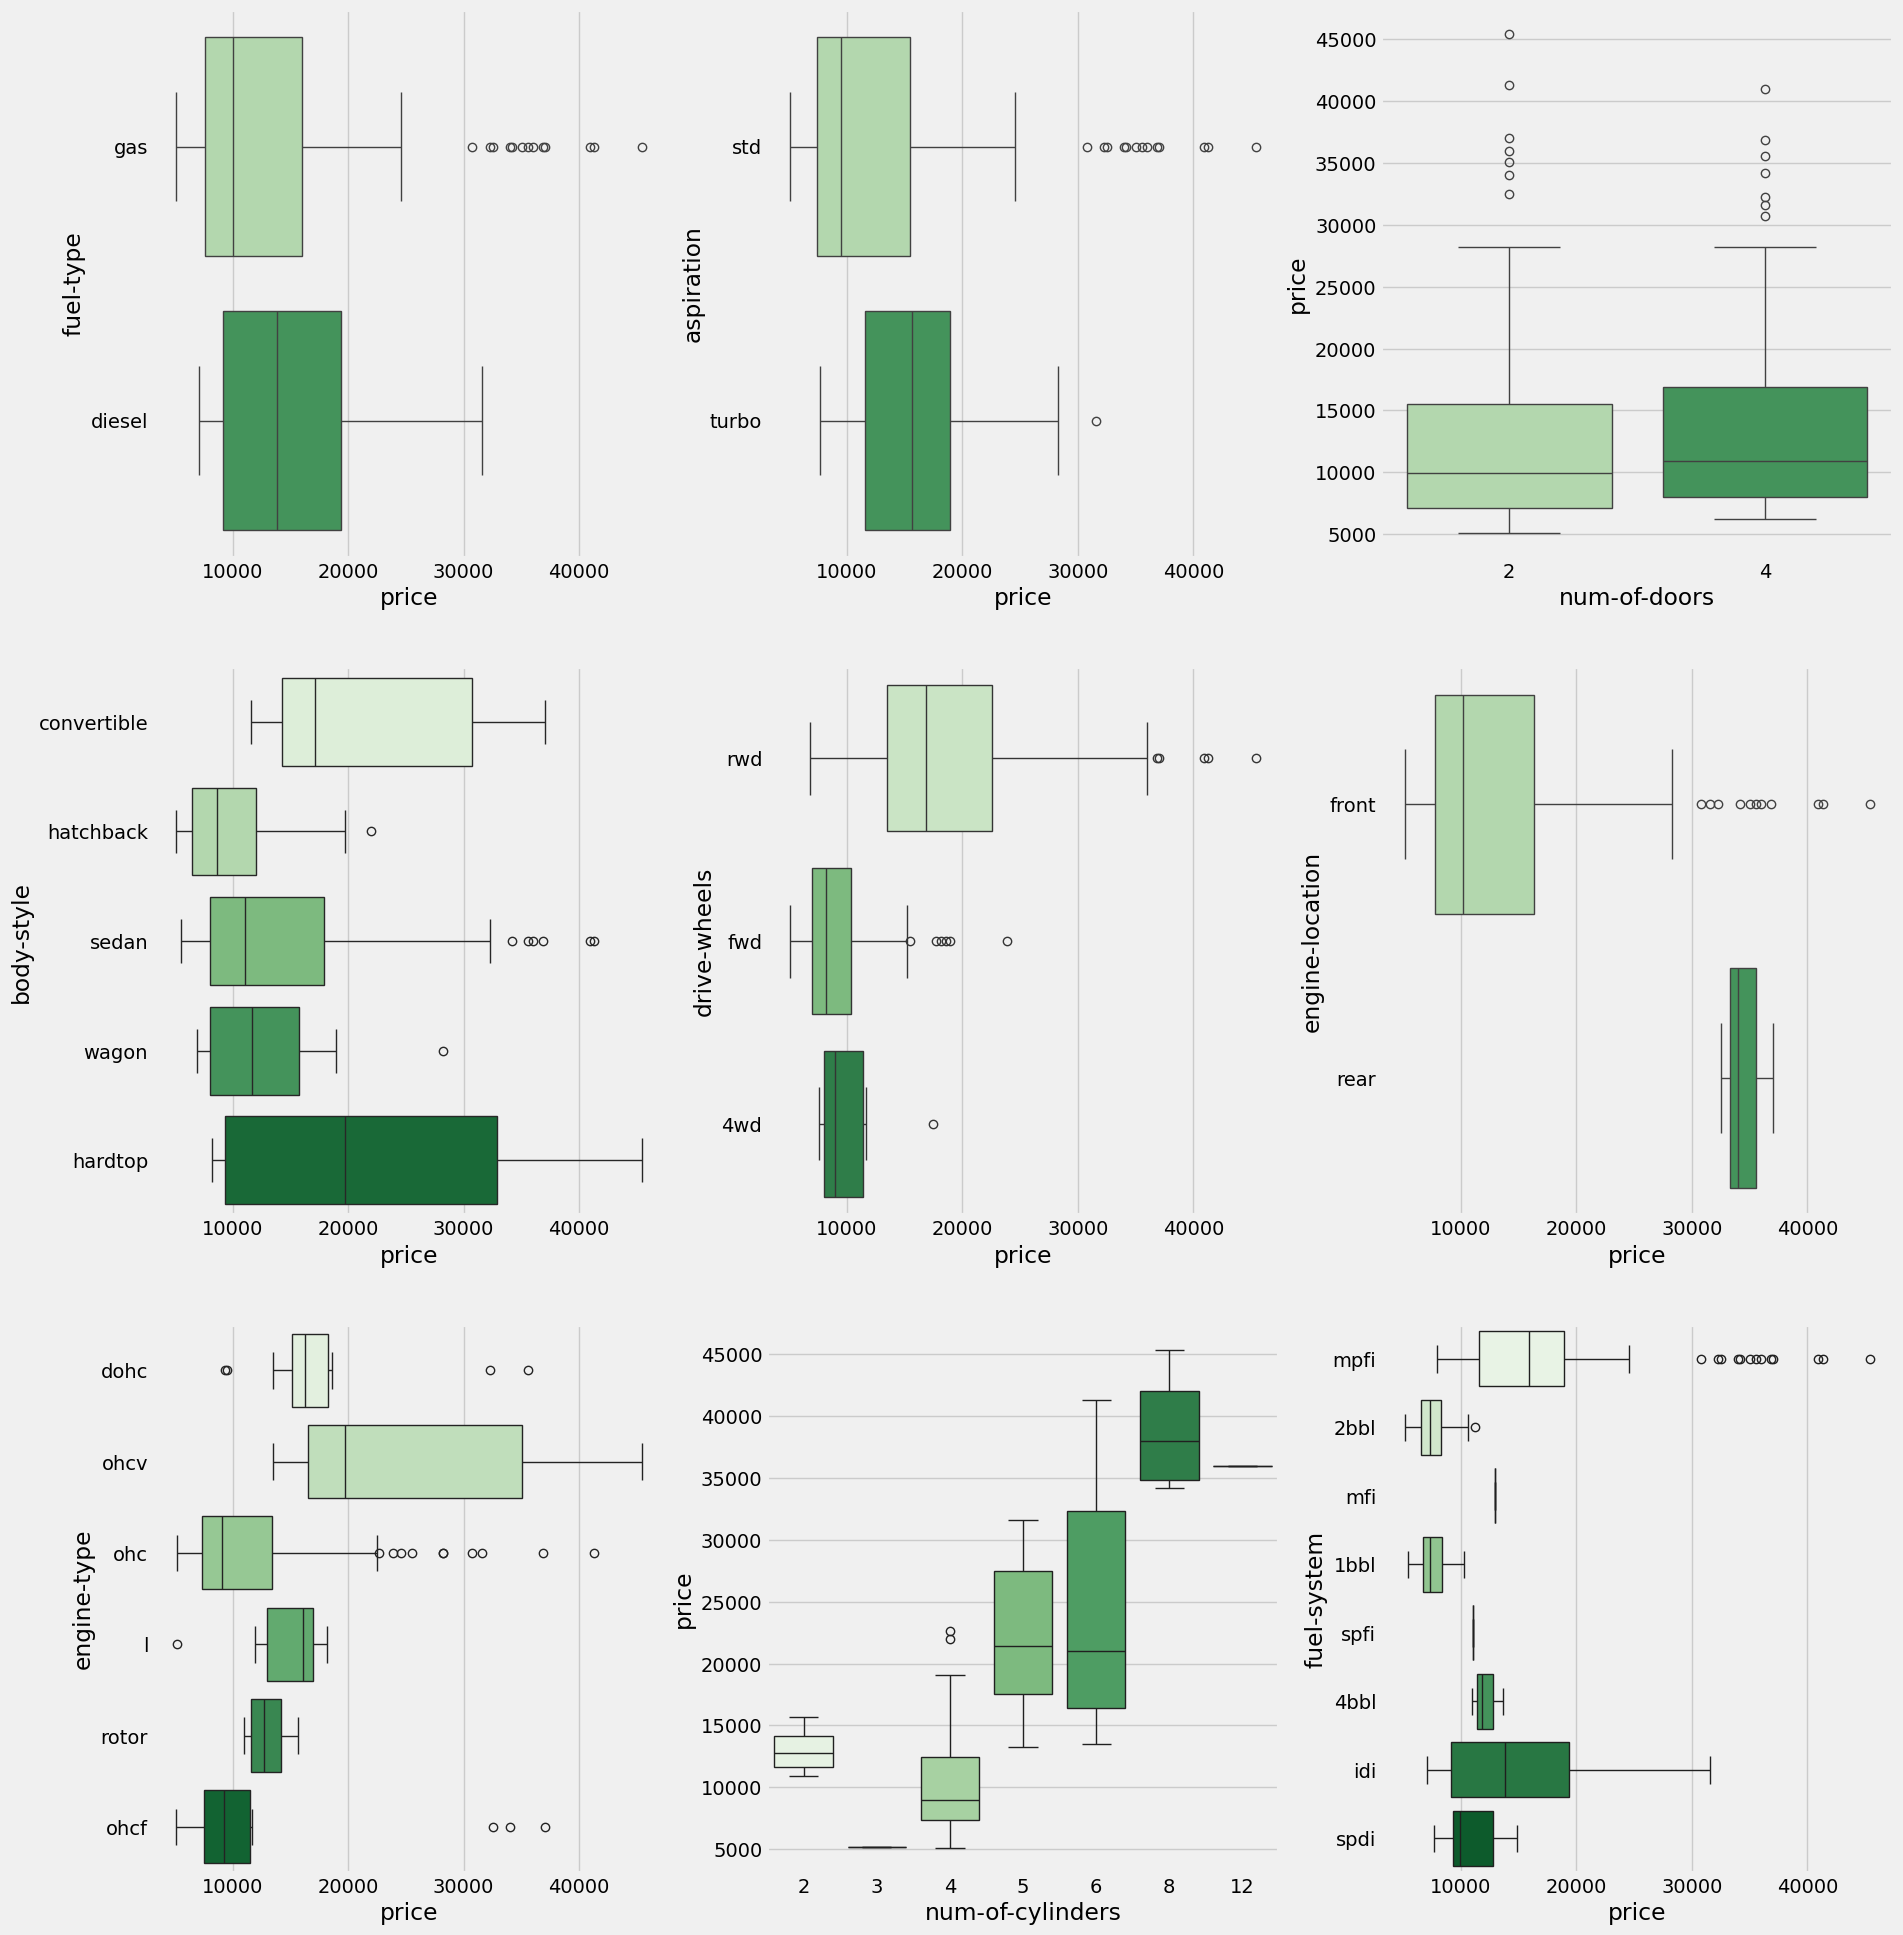

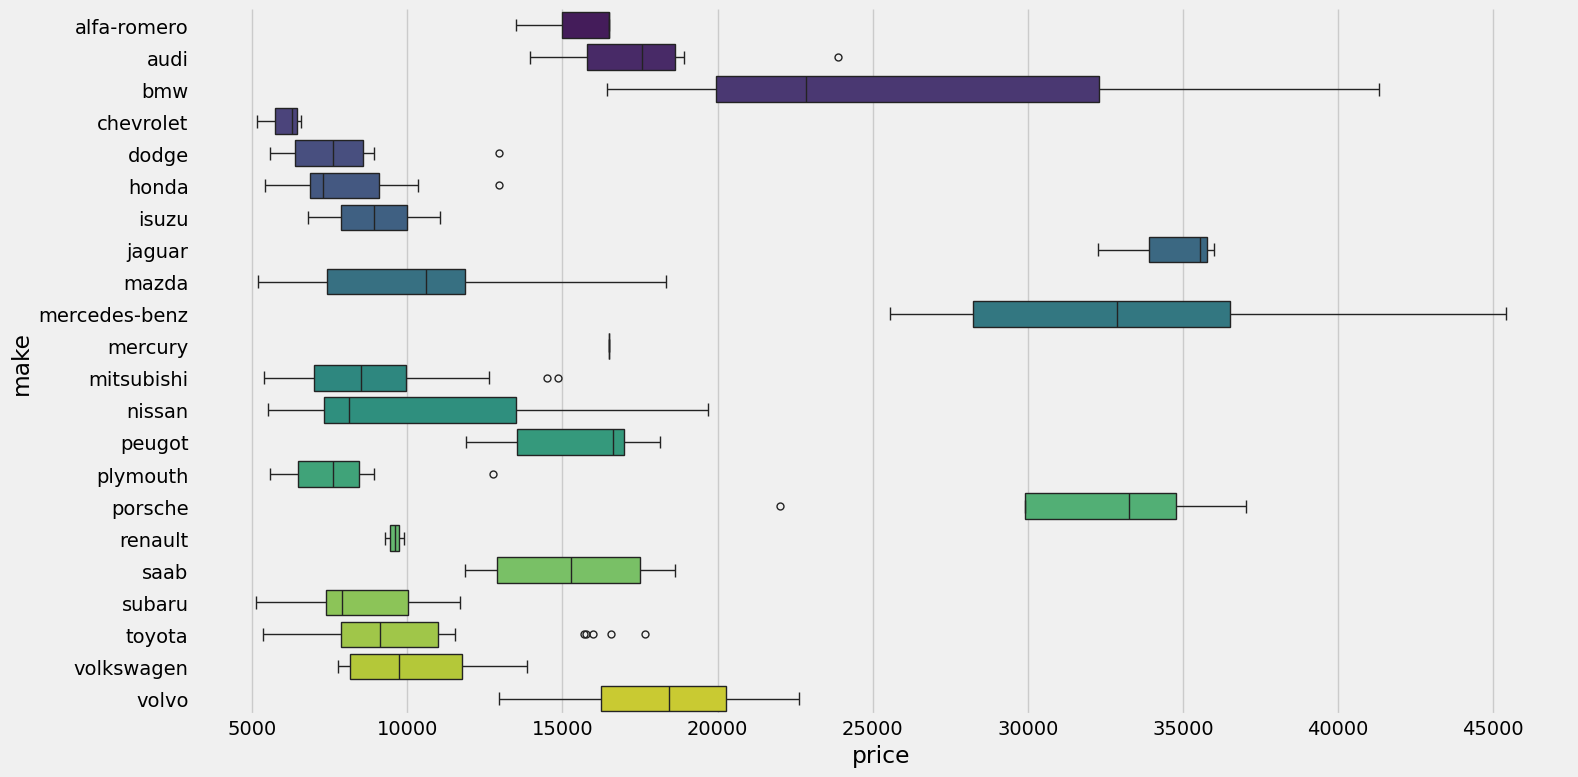

In [ ]:
Cat = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

plt.figure(figsize=(20, 23))

for i, category in enumerate(Cat, 1):
    plt.subplot(3, 3, i)

    if auto_df_clean[category].dtype == 'object':
        sns.boxplot(x='price', y=category, data=auto_df_clean, palette="Greens", legend=False)
    else:
        sns.boxplot(x=category, y='price', data=auto_df_clean, palette="Greens", legend=False)


plt.show()

# Additional Catplot for 'make' vs 'price'
sns.catplot(x="price", y="make", kind="box", data=auto_df_clean, palette="viridis", height=8, aspect=2, legend=False)
plt.show()

#Data Preprocessing for Model

## Feature Engineering

Feature engineering adalah proses menggunakan pengetahuan domain untuk mengekstrak fitur dari data mentah melalui teknik data mining. Fitur-fitur ini dapat digunakan untuk meningkatkan kinerja algoritma machine learning. Feature engineering dapat dianggap sebagai penerapan machine learning itu sendiri.

* Ada beberapa cara melakukan feature engineering.
* Banyak orang di industri menganggapnya sebagai langkah paling penting untuk meningkatkan kinerja model.
* Kita selalu harus memahami kolom dengan baik untuk membuat beberapa fitur baru menggunakan fitur yang sudah ada.
* Mari diskusikan cara-cara bagaimana kita dapat melakukan feature engineering:
    * Kita dapat melakukan Feature Engineering dengan Menghapus Kolom yang Tidak Perlu.
    * Kita dapat melakukannya dengan Mengekstrak Fitur dari Fitur Tanggal dan Waktu.
    * Kita dapat melakukannya dengan Mengekstrak Fitur dari Fitur Kategorikal.
    * Kita dapat melakukannya dengan Membuat Bin untuk Fitur Numerik dan Kategorikal.
    * Kita dapat melakukannya dengan Menggabungkan Beberapa Fitur bersama dengan menggunakan operasi aritmatika sederhana.

In [ ]:
price_correlation_df[np.abs(price_correlation_df['price']) > 0.5]

,price
wheel-base,0.584642
length,0.690628
width,0.751265
curb-weight,0.834415
num-of-cylinders,0.708645
engine-size,0.872335
bore,0.543154
horsepower,0.810500
city-mpg,-0.686571
highway-mpg,-0.704692


In [ ]:
price_correlation_df[np.abs(price_correlation_df['price']) > 0.5].index.to_list()

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'price']

In [ ]:
price_correlation_df[np.abs(price_correlation_df['price']) > 0.5].index.to_list()[:-1]

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg']

In [ ]:
categorical_features = ['make','fuel-type','aspiration','num-of-doors','body-style',
                        'drive-wheels','engine-location','engine-type','num-of-cylinders',
                        'fuel-system']
numerical_features = price_correlation_df[np.abs(price_correlation_df['price']) > 0.5].index.to_list()[:-1]

In [ ]:
features = categorical_features + numerical_features
print(features)

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg']


In [ ]:
len(features)

20

In [ ]:
target = ['price']
print(target)

['price']


In [ ]:
df_model = auto_df_clean[features + target].copy()
df_model.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,...,168.8,64.1,2548,4,130,3.47,111.0,21,27,13495.0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,...,168.8,64.1,2548,4,130,3.47,111.0,21,27,16500.0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,...,171.2,65.5,2823,6,152,2.68,154.0,19,26,16500.0
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,...,176.6,66.2,2337,4,109,3.19,102.0,24,30,13950.0
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,...,176.6,66.4,2824,5,136,3.19,115.0,18,22,17450.0


## Label Encoding

In [ ]:
label_make = LabelEncoder().fit(df_model['make'])
label_fuel_type = LabelEncoder().fit(df_model['fuel-type'])
label_aspiration = LabelEncoder().fit(df_model['aspiration'])
label_body_style = LabelEncoder().fit(df_model['body-style'])
label_drive_wheels = LabelEncoder().fit(df_model['drive-wheels'])
label_engine_location = LabelEncoder().fit(df_model['engine-location'])
label_engine_type = LabelEncoder().fit(df_model['engine-type'])
label_fuel_system = LabelEncoder().fit(df_model['fuel-system'])

df_model['make'] = label_make.transform(df_model['make'])
df_model['fuel-type'] = label_fuel_type.transform(df_model['fuel-type'])
df_model['aspiration'] = label_aspiration.transform(df_model['aspiration'])
df_model['body-style'] = label_body_style.transform(df_model['body-style'])
df_model['drive-wheels'] = label_drive_wheels.transform(df_model['drive-wheels'])
df_model['engine-location'] = label_engine_location.transform(df_model['engine-location'])
df_model['engine-type'] = label_engine_type.transform(df_model['engine-type'])
df_model['fuel-system'] = label_fuel_system.transform(df_model['fuel-system'])

df_model.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,2,0,0,4,5,...,168.8,64.1,2548,4,130,3.47,111.0,21,27,13495.0
1,0,1,0,2,0,2,0,0,4,5,...,168.8,64.1,2548,4,130,3.47,111.0,21,27,16500.0
2,0,1,0,2,2,2,0,4,6,5,...,171.2,65.5,2823,6,152,2.68,154.0,19,26,16500.0
3,1,1,0,4,3,1,0,2,4,5,...,176.6,66.2,2337,4,109,3.19,102.0,24,30,13950.0
4,1,1,0,4,3,0,0,2,5,5,...,176.6,66.4,2824,5,136,3.19,115.0,18,22,17450.0


In [ ]:
label_body_style.classes_

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

In [ ]:
for i in range(len(label_body_style.classes_)):
  print(i, '->', label_body_style.classes_[i])

0 -> convertible
1 -> hardtop
2 -> hatchback
3 -> sedan
4 -> wagon


In [ ]:
for i in range(len(label_make.classes_)):
  print(i, '->', label_make.classes_[i])

0 -> alfa-romero
1 -> audi
2 -> bmw
3 -> chevrolet
4 -> dodge
5 -> honda
6 -> isuzu
7 -> jaguar
8 -> mazda
9 -> mercedes-benz
10 -> mercury
11 -> mitsubishi
12 -> nissan
13 -> peugot
14 -> plymouth
15 -> porsche
16 -> renault
17 -> saab
18 -> subaru
19 -> toyota
20 -> volkswagen
21 -> volvo


In [ ]:
output_label = '/content/drive/MyDrive/Data Science KPTK/label_encoder/'
# Save the LabelEncoders to files
dump(label_make, output_label+'label_make_encoder.joblib')
dump(label_fuel_type, output_label+'label_fuel_type_encoder.joblib')
dump(label_aspiration, output_label+'label_aspiration_encoder.joblib')
dump(label_body_style, output_label+'label_body_style_encoder.joblib')
dump(label_drive_wheels, output_label+'label_drive_wheels_encoder.joblib')
dump(label_engine_location, output_label+'label_engine_location_encoder.joblib')
dump(label_engine_type, output_label+'label_engine_type_encoder.joblib')
dump(label_fuel_system, output_label+'label_fuel_system_encoder.joblib')

['/content/drive/MyDrive/Data Science KPTK/label_encoder/label_fuel_system_encoder.joblib']

In [ ]:
tes_load = load("/content/drive/MyDrive/Data Science KPTK/label_encoder/label_fuel_type_encoder.joblib")

for i in range(len(tes_load.classes_)):
  print(i, '->', tes_load.classes_[i])

0 -> diesel
1 -> gas


In [ ]:
tes_import_label = load(output_label+'label_body_style_encoder.joblib')

for i in range(len(tes_import_label.classes_)):
  print(i, '->', tes_import_label.classes_[i])

0 -> convertible
1 -> hardtop
2 -> hatchback
3 -> sedan
4 -> wagon


## Data Splitting

In [ ]:
# Split the data into training and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    df_model[features], df_model[target],
    test_size=0.2,
    random_state=42
)

# Split the temporary data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_temp, y_train_temp,
    test_size=0.25,  # 0.25 x 0.8 = 0.2 (20% for validation)
    random_state=42
)

# Print the shapes of the sets
print('Training Shape  = ', X_train.shape, y_train.shape)
print('Validation Shape= ', X_valid.shape, y_valid.shape)
print('Testing Shape   = ', X_test.shape, y_test.shape)

Training Shape  =  (120, 22) (120, 1)
Validation Shape=  (40, 22) (40, 1)
Testing Shape   =  (41, 22) (41, 1)


# Modelling

##Linear Regression

In [ ]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8799595028392471

In [ ]:
lr_score = lr.score(X_valid, y_valid)
lr_score

0.6838815316149832

In [ ]:
y_pred_lr = lr.predict(X_valid)

In [ ]:
lr_rscore = r2_score(y_valid, y_pred_lr)
lr_mae = mean_absolute_error(y_valid, y_pred_lr)
lr_mse = mean_squared_error(y_valid, y_pred_lr)
lr_rmse = mean_squared_error(y_valid, y_pred_lr, squared=False)

In [ ]:
print('Linear Regression')
print(f'R-squared                : {lr_score:.2f}')
print(f'Mean Absolute Error      : {lr_mae:,.2f}')
print(f'Mean Squared Error       : {lr_mse:,.2f}')
print(f'Root Mean Squared Error  : {lr_rmse:,.2f}')

Linear Regression
R-squared                : 0.68
Mean Absolute Error      : 2,255.04
Mean Squared Error       : 8,682,001.31
Root Mean Squared Error  : 2,946.52


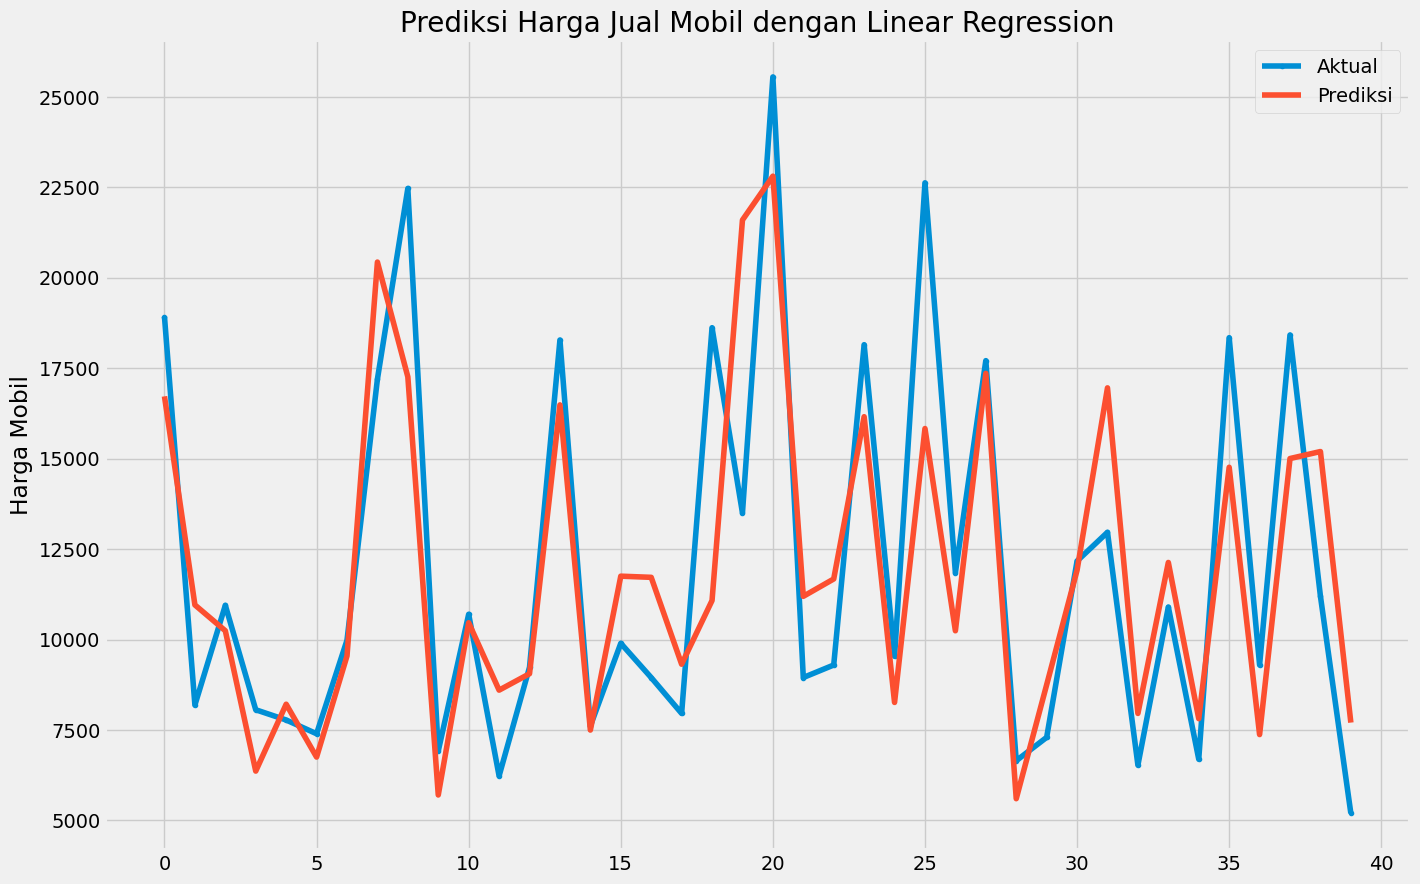

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_valid)), y_valid, marker='.', label="Aktual")
plt.plot(range(len(y_valid)), y_pred_lr.flatten(), label="Prediksi")
plt.ylabel('Harga Mobil')
plt.title('Prediksi Harga Jual Mobil dengan Linear Regression')
plt.legend()
plt.show()

## Decision Tree

In [ ]:
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9989326338164176

In [ ]:
dt_score = dt.score(X_valid, y_valid)
dt_score

0.729493848737278

In [ ]:
y_pred_dt = dt.predict(X_valid)

In [ ]:
dt_rscore = r2_score(y_valid, y_pred_dt)
dt_mae = mean_absolute_error(y_valid, y_pred_dt)
dt_mse = mean_squared_error(y_valid, y_pred_dt)
dt_rmse = mean_squared_error(y_valid, y_pred_dt, squared=False)

In [ ]:
print('Decision Tree')
print(f'R-squared                : {dt_score:.2f}')
print(f'Mean Absolute Error      : {dt_mae:,.2f}')
print(f'Mean Squared Error       : {dt_mse:,.2f}')
print(f'Root Mean Squared Error  : {dt_rmse:,.2f}')

Decision Tree
R-squared                : 0.73
Mean Absolute Error      : 1,920.54
Mean Squared Error       : 7,429,286.78
Root Mean Squared Error  : 2,725.67


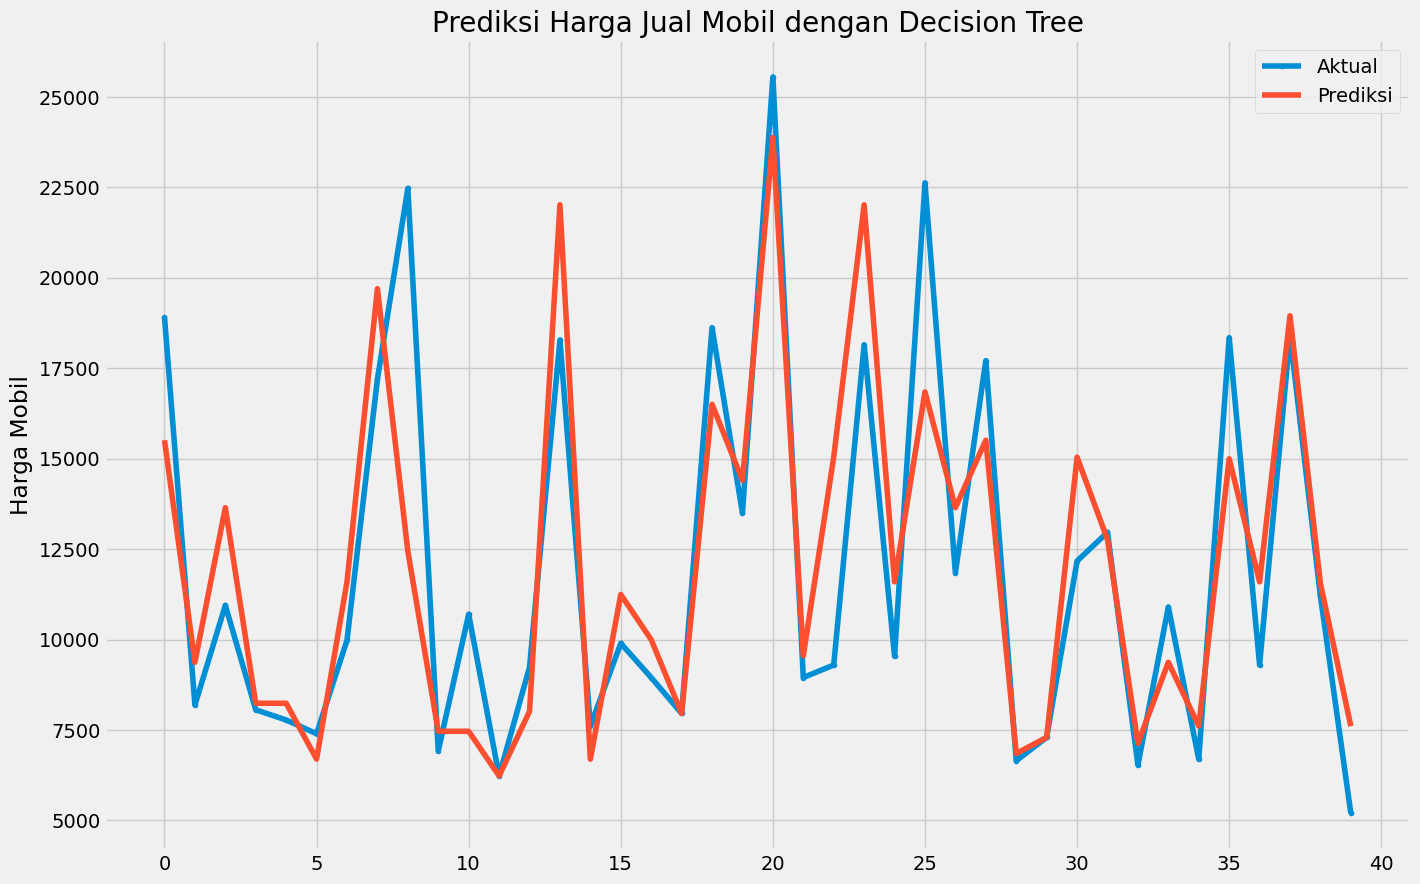

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_valid)), y_valid, marker='.', label="Aktual")
plt.plot(range(len(y_valid)), y_pred_dt.flatten(), label="Prediksi")
plt.ylabel('Harga Mobil')
plt.title('Prediksi Harga Jual Mobil dengan Decision Tree')
plt.legend()
plt.show()

## Random Forest

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto'
)

rf.fit(X_train, y_train)
rf.score(X_train, y_train)

<ipython-input-88-89facf6ba9c6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.9804765569220437

In [ ]:
rf_score = rf.score(X_valid, y_valid)
rf_score

0.8220900391933791

In [ ]:
y_pred_rf = rf.predict(X_valid)

In [ ]:
rf_rscore = r2_score(y_valid, y_pred_rf)
rf_mae = mean_absolute_error(y_valid, y_pred_rf)
rf_mse = mean_squared_error(y_valid, y_pred_rf)
rf_rmse = mean_squared_error(y_valid, y_pred_rf, squared=False)

In [ ]:
print('Random Forest')
print(f'R-squared                : {rf_score:.2f}')
print(f'Mean Absolute Error      : {rf_mae:,.2f}')
print(f'Mean Squared Error       : {rf_mse:,.2f}')
print(f'Root Mean Squared Error  : {rf_rmse:,.2f}')

Random Forest
R-squared                : 0.82
Mean Absolute Error      : 1,567.03
Mean Squared Error       : 4,886,188.78
Root Mean Squared Error  : 2,210.47


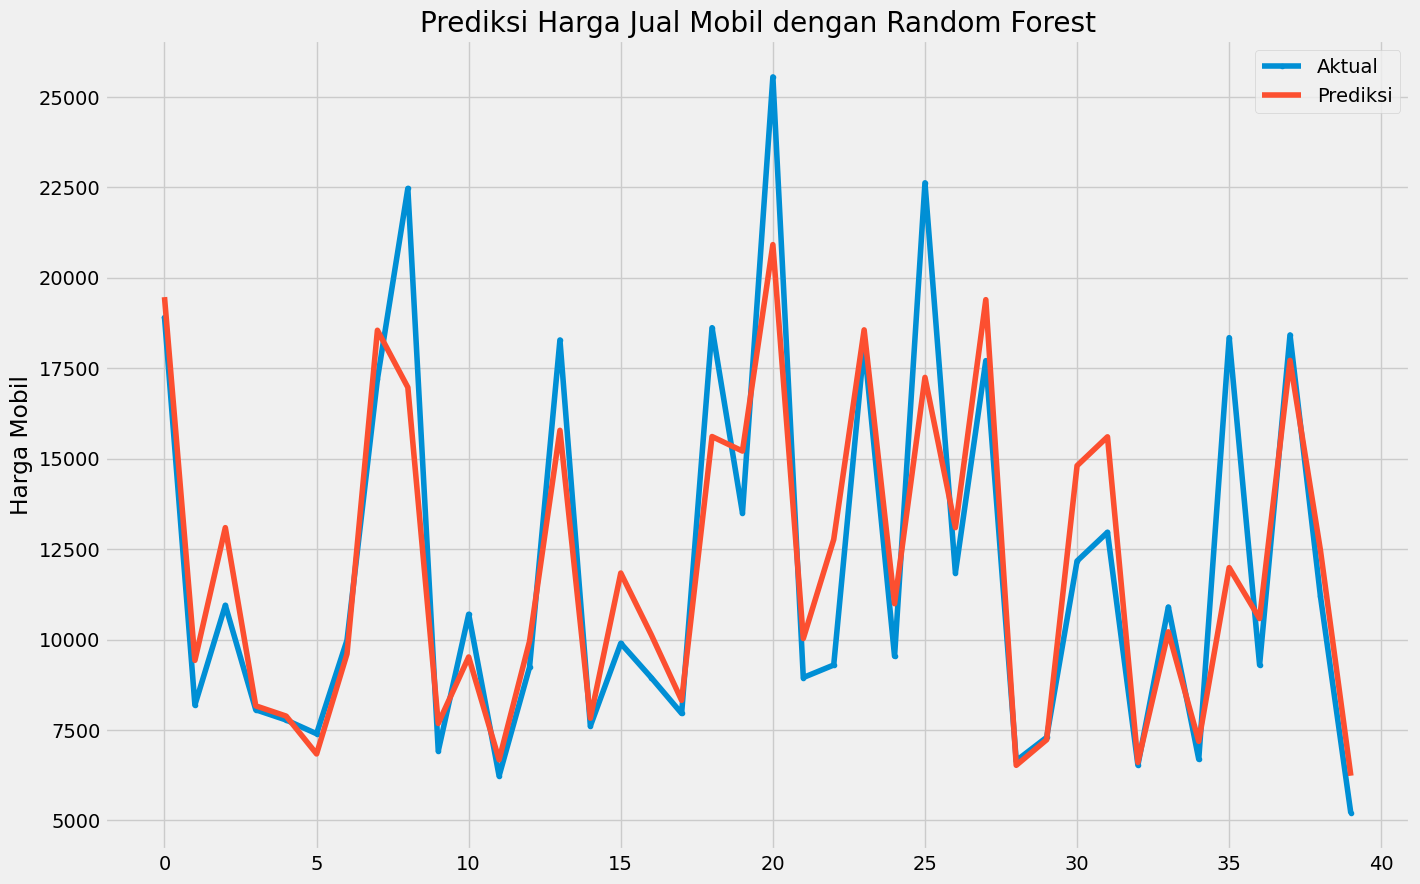

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_valid)), y_valid, marker='.', label="Aktual")
plt.plot(range(len(y_valid)), y_pred_rf.flatten(), label="Prediksi")
plt.ylabel('Harga Mobil')
plt.title('Prediksi Harga Jual Mobil dengan Random Forest')
plt.legend()
plt.show()

#Perbandingan

In [ ]:
print(f'Nilai MSE Linear Regression  = {lr_mse:,.2f}')
print(f'Nilai MSE Decision Tree      = {dt_mse:,.2f}')
print(f'Nilai MSE Random Forest      = {rf_mse:,.2f}')
print('========================================================')
print(f'Nilai RMSE Linear Regression = {lr_rmse:,.2f}')
print(f'Nilai RMSE Decision Tree     = {dt_rmse:,.2f}')
print(f'Nilai RMSE Random Forest     = {rf_rmse:,.2f}')
print('========================================================')
print(f'Nilai MAE Linear Regression  = {lr_mae:,.2f}')
print(f'Nilai MAE Decision Tree      = {dt_mae:,.2f}')
print(f'Nilai MAE Random Forest      = {rf_mae:,.2f}')
print('========================================================')
print(f'Nilai R2 Linear Regression   = {lr_rscore:.2f}')
print(f'Nilai R2 Decision Tree       = {dt_rscore:.2f}')
print(f'Nilai R2 Random Forest       = {rf_rscore:.2f}')

Nilai MSE Linear Regression  = 8,682,001.31
Nilai MSE Decision Tree      = 7,429,286.78
Nilai MSE Random Forest      = 4,886,188.78
Nilai RMSE Linear Regression = 2,946.52
Nilai RMSE Decision Tree     = 2,725.67
Nilai RMSE Random Forest     = 2,210.47
Nilai MAE Linear Regression  = 2,255.04
Nilai MAE Decision Tree      = 1,920.54
Nilai MAE Random Forest      = 1,567.03
Nilai R2 Linear Regression   = 0.68
Nilai R2 Decision Tree       = 0.73
Nilai R2 Random Forest       = 0.82


In [ ]:
# Best Model adalah Random Forest
lokasi_model = '/content/drive/MyDrive/Data Science KPTK/model/model_rf.joblib'
dump(rf, lokasi_model)

['/content/drive/MyDrive/Data Science KPTK/model/model_rf.joblib']

# Load Model for Prediction (Test Dataset)

In [ ]:
model = load(lokasi_model)
model

RandomForestRegressor(max_features='auto')

In [ ]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8747594227538903

In [ ]:
rscore = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Random Forest')
print(f'R-squared                : {rscore:.2f}')
print(f'Mean Absolute Error      : {mae:,.2f}')
print(f'Mean Squared Error       : {mse:,.2f}')
print(f'Root Mean Squared Error  : {rmse:,.2f}')

Random Forest
R-squared                : 0.87
Mean Absolute Error      : 2,431.54
Mean Squared Error       : 15,322,780.49
Root Mean Squared Error  : 3,914.43


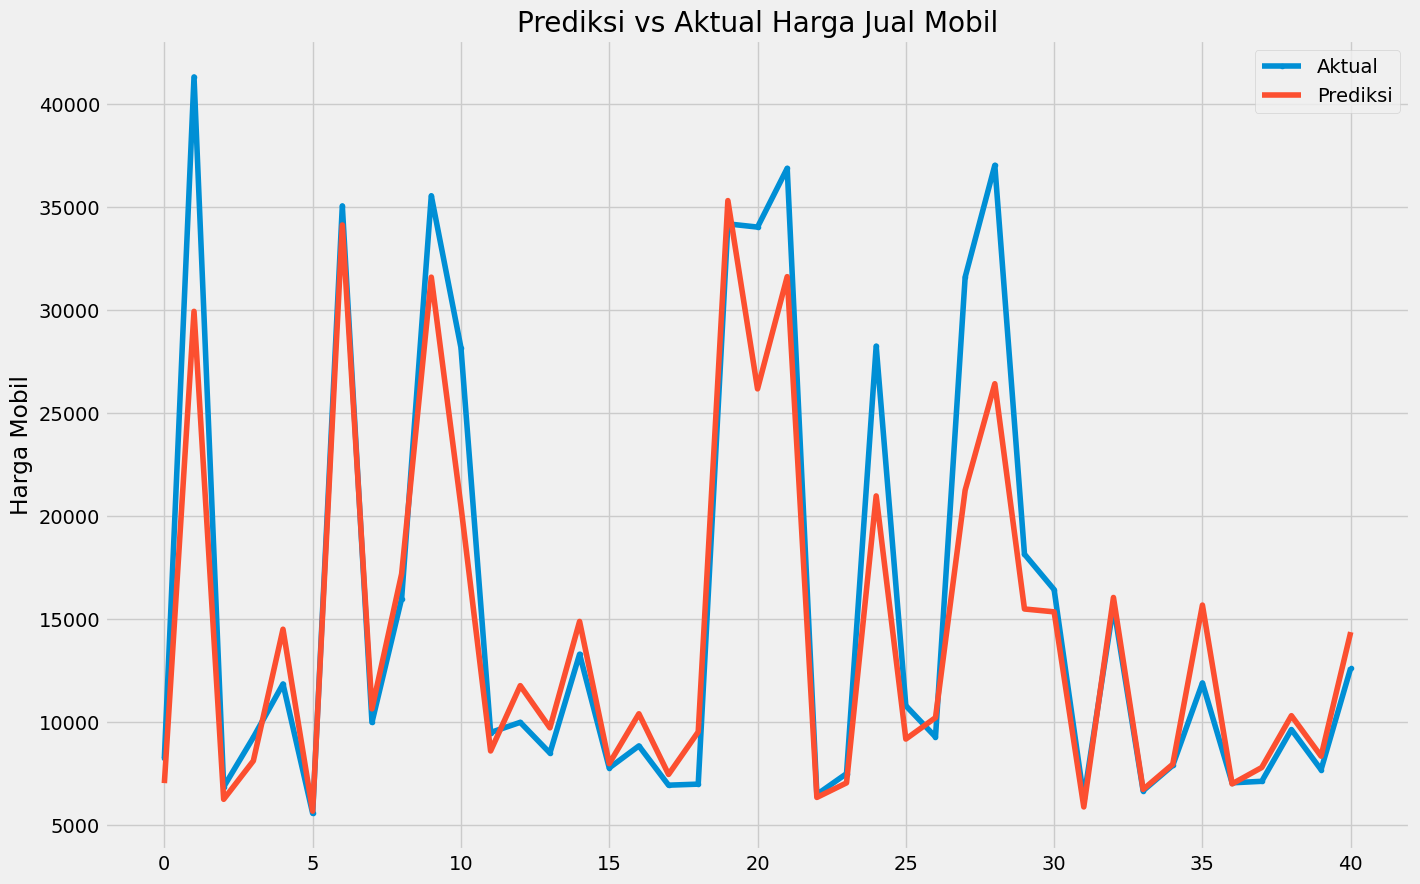

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Harga Mobil')
plt.title('Prediksi vs Aktual Harga Jual Mobil')
plt.legend()
plt.show()